# Brainstation Capstone Project

## Data Science Bootcamp: November 2023 - February 2024

Welcome to my Capstone Project for the Brainstation Data Science Bootcamp. This project represents the culmination of intensive learning and hands-on experience in data science from November 2023 to February 2024.

# Project Overview

## Project Description
This capstone project is centered around developing a predictive analysis tool in medical data science, focusing on diseases like heart failure, stroke, diabetes, and cancer. The aim is to create a model that predicts the likelihood of these health conditions based on medical and demographic data.

## Objective
The primary goal is to leverage data science and machine learning to provide early warnings for critical health conditions, aiding in early diagnosis and improving patient outcomes.

## Key Challenges
- **Data Quality and Reliability**: Ensuring the datasets used are accurate and reliable.
- **Model Accuracy and Validation**: Building models that are not only accurate but also clinically valid.
- **Handling Imbalanced Data**: Dealing with the common issue of imbalanced datasets in medical data.
- **Ethical Considerations**: Addressing data privacy and ethical concerns in predictive healthcare analytics.

## Technologies Used
- **Programming Languages**: Python, including libraries like Pandas, NumPy, and Scikit-learn.
- **Data Visualization**: Using Matplotlib and Seaborn for insights visualization.
- **Machine Learning Frameworks**: Exploring TensorFlow or PyTorch for advanced modeling.

## Expected Outcomes
- **Project**: A robust predictive model for disease risk assessment.
- **Personal Development**: Improved expertise in data science and machine learning, with a focus on healthcare applications.

## Why This Project?
I am deeply interested in the convergence of data science and healthcare. This project offers the opportunity to impact patient care through predictive analytics, aligning with my passion for applying data science to solve real-world problems and enhancing my skills in this critical area.


---

Feel free to explore the different sections of this notebook to see the progress, analysis, and results of my capstone project. I appreciate any feedback or suggestions!


# Masoud Arefi

Welcome to my professional portfolio in Data Science. Below are links to my LinkedIn profile and GitHub repository where you can find my projects and contributions.

## Connect with Me

- [LinkedIn](https://www.linkedin.com/in/masoud-arefi/)
- [GitHub](https://github.com/MaSOouD69/capstone-repo)

### About Me

I am a passionate data science professional with a keen interest in developing insightful data-driven solutions. My expertise lies in leveraging analytical tools and machine learning techniques to unravel complex data challenges.

Feel free to explore my projects and reach out for collaborations or discussions!


# First Data set 
# Stroke Prediction and Analysis

## Introduction

Strokes significantly impact global health, with a surprising fact: 80% of strokes are preventable. This notebook explores key indicators leading to strokes, using data from diverse age groups, genders, habits, and health issues. Our visualizations aim to be intuitive, employing simple yet effective methods for conveying essential information.

## Problem Statement

Our goal is to visualize the relationships between various lifestyle habits and heart stroke occurrences. We aim to predict stroke probability using optimally tuned models, providing insights for preventive health measures.

## Questions and Assumptions

In this analysis, we will investigate several questions and assumptions:

1. **Impact of Age**: Does age significantly influence stroke occurrence, and what is its distribution across populations?
2. **BMI and Glucose Levels**: How do higher body mass index and glucose levels correlate with stroke risk?
3. **Smoking and Stroke Risk**: Is there a strong link between smoking and increased stroke risk?
4. **Heart Disease and Stroke**: How closely are existing heart diseases and stroke occurrences related?
5. **Workload and Blood Pressure**: Can high workload and resultant blood pressure increases lead to strokes?
6. **Gender-Specific Risks**: Are males more prone to strokes due to work-related stress, or do risks vary across genders?

## Methodology

- **Data Analysis**: Comprehensive examination of the dataset to understand feature distribution and relationships.
- **Visualizations**: Using plots and charts to uncover patterns and insights.
- **Statistical Testing**: Validating assumptions and hypotheses through statistical methods.
- **Model Building**: Developing predictive models for stroke risk estimation.
- **Feature Importance**: Identifying key factors that significantly influence stroke risk.
- **Feature Selection**: Enhancing model accuracy by selecting relevant features.

## Conclusion

This notebook aims to provide a deeper understanding of the factors leading to strokes and their interplay, essential for developing preventive strategies and early interventions.


In [1]:
# libraries import
import numpy as np  # Importing NumPy for numerical operations and array handling
import pandas as pd  # Importing Pandas for data manipulation and analysis
import seaborn as sns  # Importing Seaborn for statistical data visualization
import matplotlib.pyplot as plt  # Importing Matplotlib for creating static plots
import plotly.express as xp  # Importing Plotly Express for interactive plotting

# Importing necessary libraries from scikit-learn
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.linear_model import LogisticRegression  # Importing Logistic Regression model for classification tasks
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Importing various metrics to evaluate model performance

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler  # Importing different scalers for data normalization and standardization

# metrics
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score  # Additional metrics for model evaluation, especially for classification problems

from sklearn.neighbors import KNeighborsClassifier  # Importing K-Nearest Neighbors classifier
from sklearn.tree import DecisionTreeClassifier  # Importing Decision Tree classifier for decision tree models

from imblearn.over_sampling import SMOTE  # Importing SMOTE for handling imbalanced datasets by oversampling

from sklearn.svm import SVC  # Importing Support Vector Machine classifier


In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


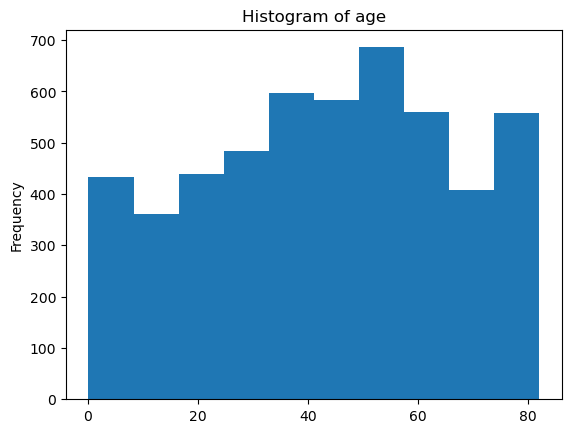

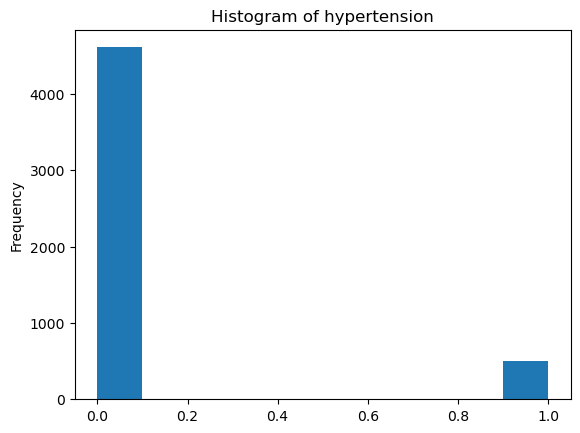

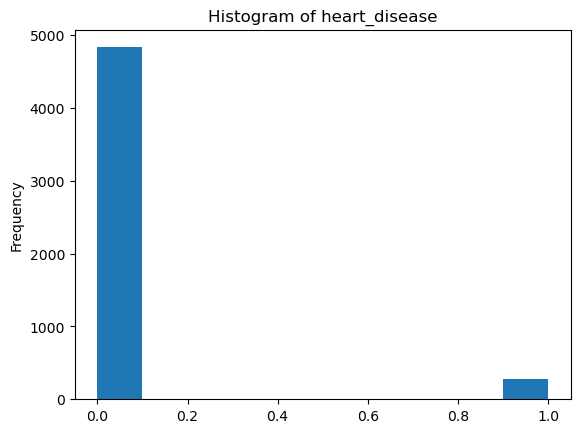

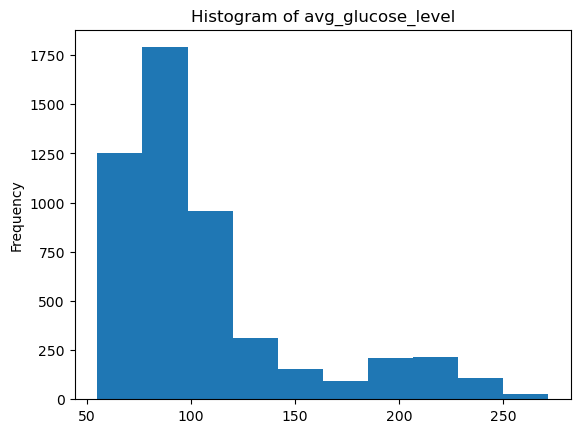

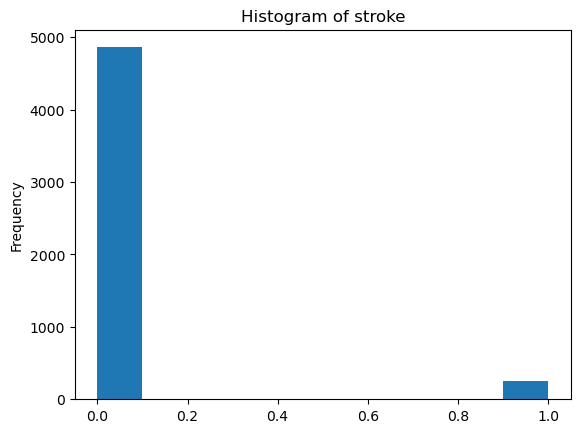

In [5]:
# Loop through each column and plot a histogram for each numeric columns
for i in ['age','hypertension','heart_disease','avg_glucose_level','stroke']:
    plt.figure()  # Create a new figure for each plot
    df[i].plot(kind='hist')
    plt.title(f'Histogram of {i}')
    plt.show()  # Display the plot

From histogramof Stroke distribution it is clear that every 5 people out of 100 people are having strokes from our sampling data. Moreover,this is a highly unbalanced data distribution, and null accuracy score of this distribution it self is 95%, whcih imploys any dump model should randomly predictions of stroke could reach accuracy of 95%. So, while modeling and training data, either over sampling or under sampling has to be done to obtain best results.

In [6]:
# stats of categorical data
round (df.describe(exclude = ['float', 'int64']),2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


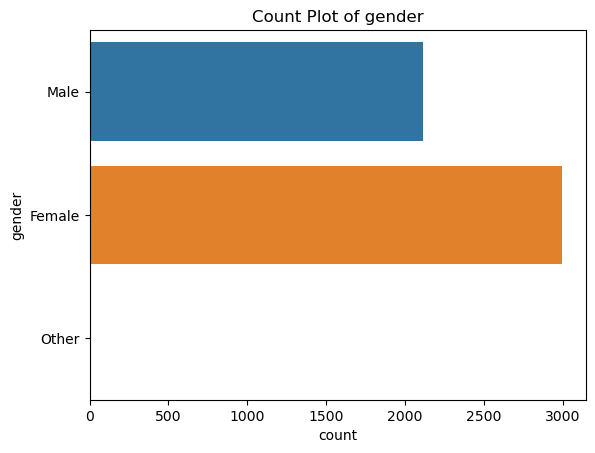

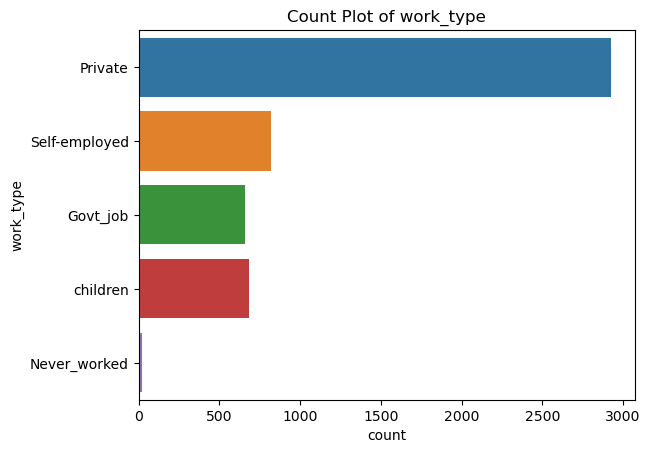

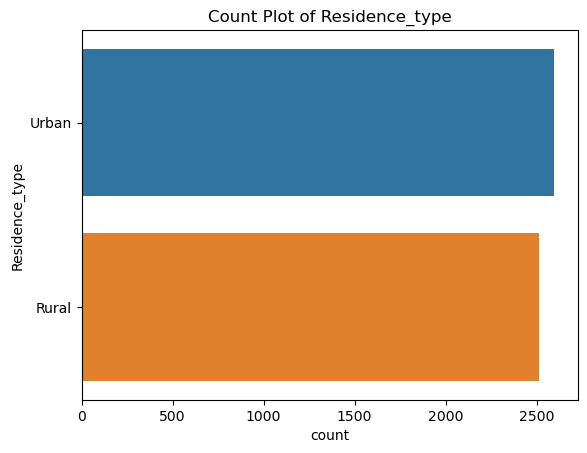

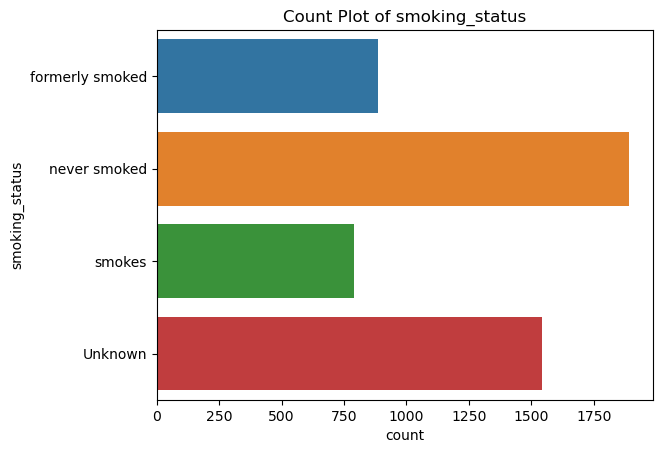

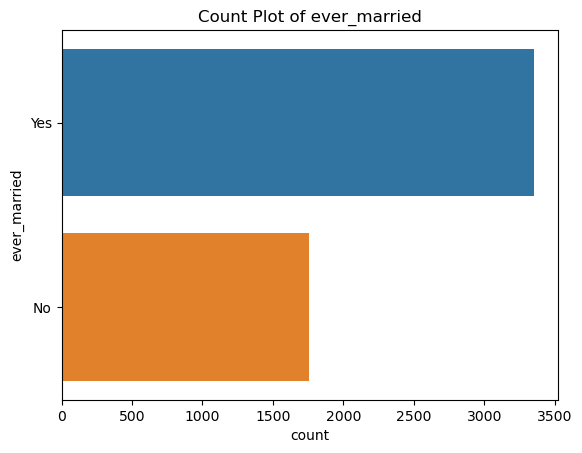

In [7]:
non_num_df = ['gender','work_type','Residence_type','smoking_status','ever_married']
for i in non_num_df:
    plt.figure()  # Create a new figure for each p
    
    # For non-numeric data, use a count plot
    sns.countplot(y=df[i], data=df)
    plt.title(f'Count Plot of {i}')

    plt.show()  # Display the plot

In [8]:
df[['gender','work_type','Residence_type','smoking_status','ever_married']].head()

,gender,work_type,Residence_type,smoking_status,ever_married
0,Male,Private,Urban,formerly smoked,Yes
1,Female,Self-employed,Rural,never smoked,Yes
2,Male,Private,Rural,never smoked,Yes
3,Female,Private,Urban,smokes,Yes
4,Female,Self-employed,Rural,never smoked,Yes


In [9]:
# look at null values
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
# Filter the DataFrame for rows where 'bmi' is null
df_null_bmi = df[df['bmi'].isna()]
df_null_bmi.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1


Use visalization for null values

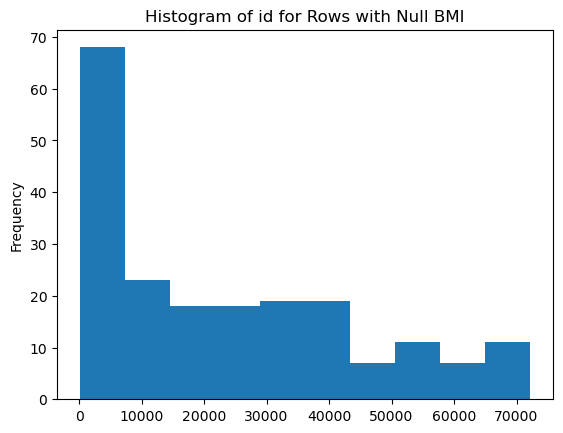

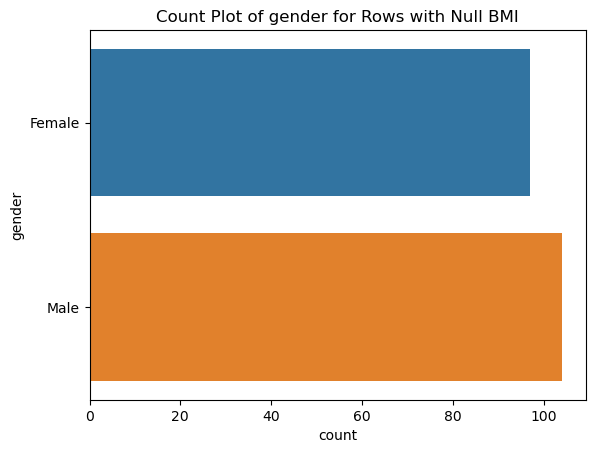

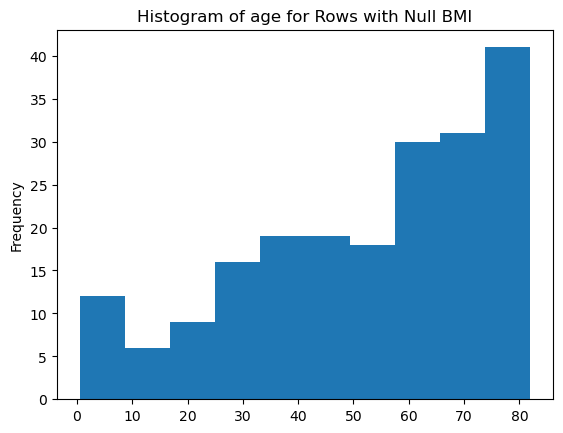

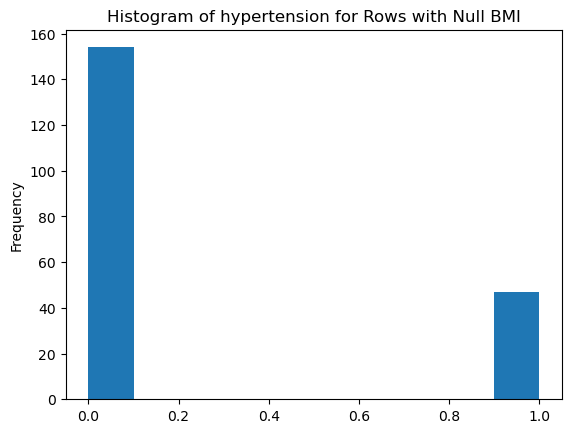

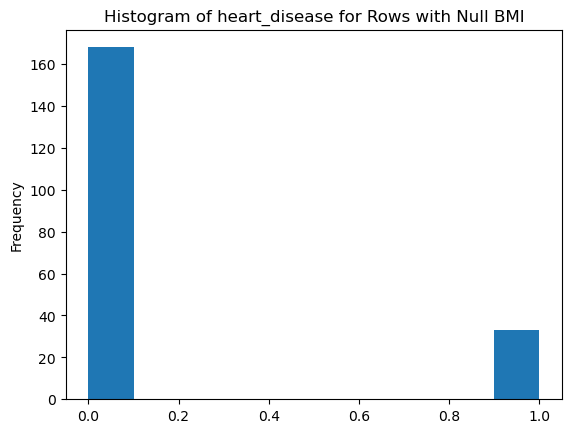

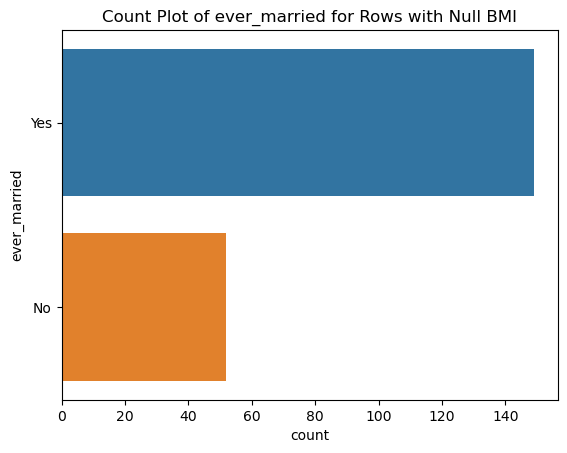

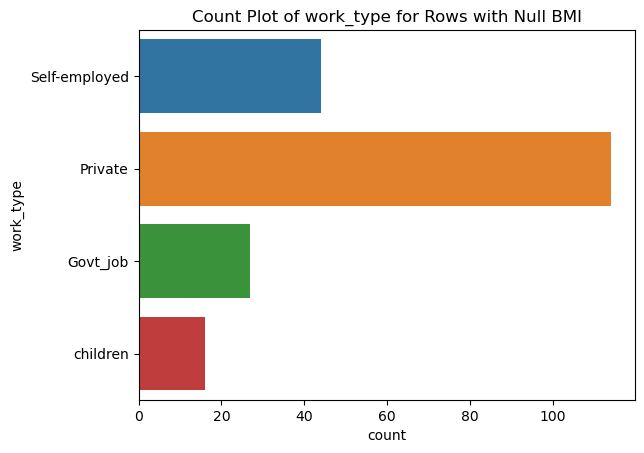

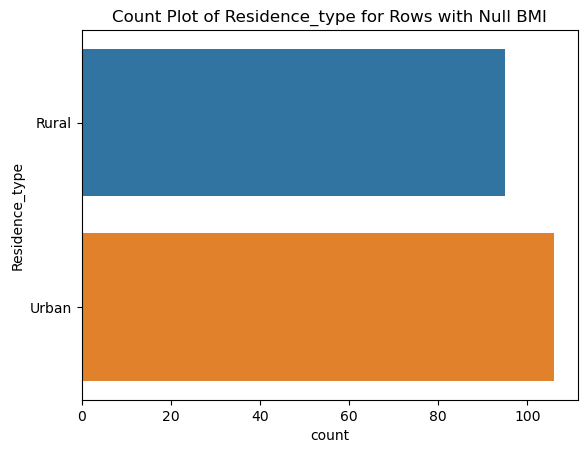

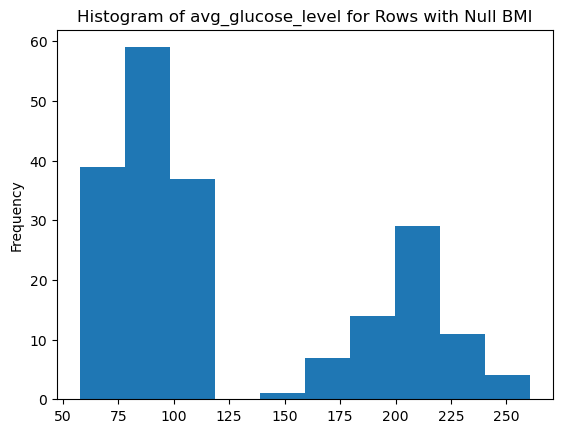

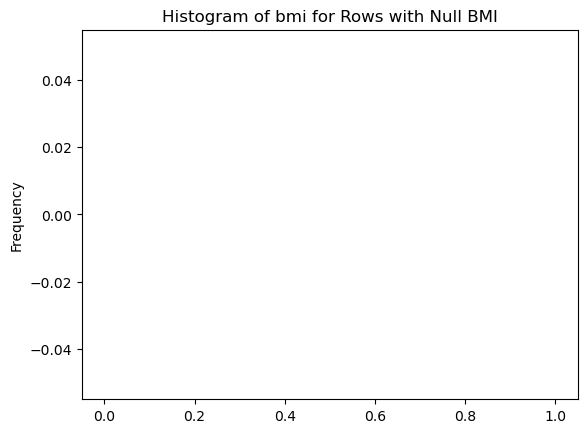

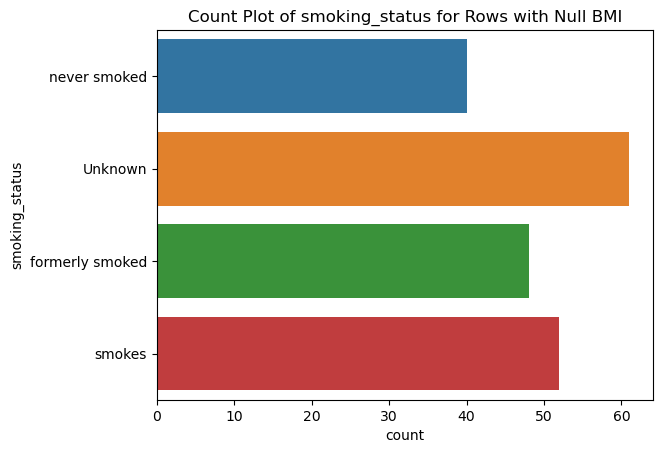

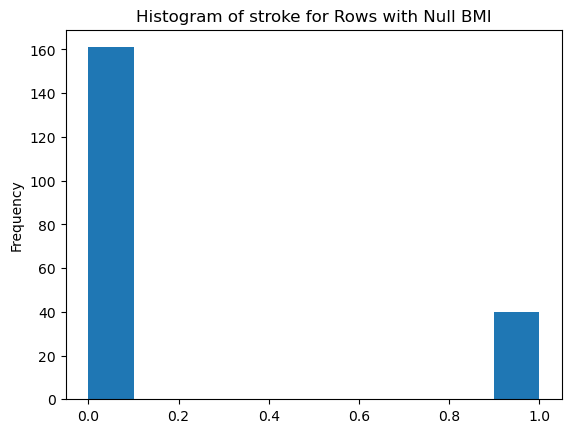

In [11]:
# Filter the DataFrame for rows where 'bmi' is null
df_null_bmi = df[df['bmi'].isna()]

# Loop through each column
for i in df_null_bmi.columns:
    plt.figure()  # Create a new figure for each plot

    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(df_null_bmi[i]):
        df_null_bmi[i].plot(kind='hist')
        plt.title(f'Histogram of {i} for Rows with Null BMI')
    else:
        # For non-numeric data, use a count plot
        sns.countplot(y=i, data=df_null_bmi)
        plt.title(f'Count Plot of {i} for Rows with Null BMI')

    plt.show()  # Display the plot

As we observe the visuals for both the entire DataFrame and the subset with null BMI values, the most standout feature is the 'glucose' column. Let's take a closer look at distributions.

Text(0.5, 1.0, 'Histogram of avg_glucose_level for Rows with Null BMI')

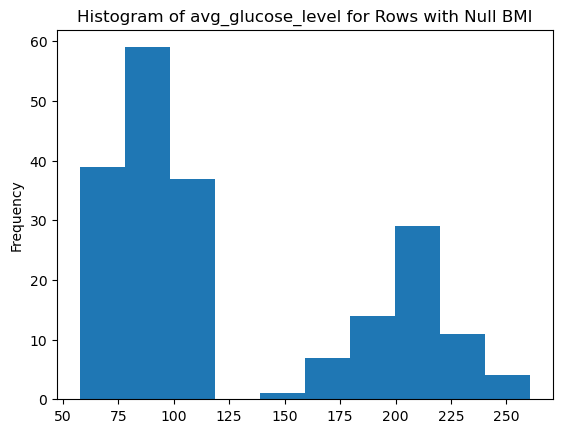

In [12]:
# avg_glucose_level for whole dataframe
df_null_bmi['avg_glucose_level'].plot(kind='hist')
plt.title(f'Histogram of avg_glucose_level for Rows with Null BMI')

Text(0.5, 1.0, 'Histogram of avg_glucose_level')

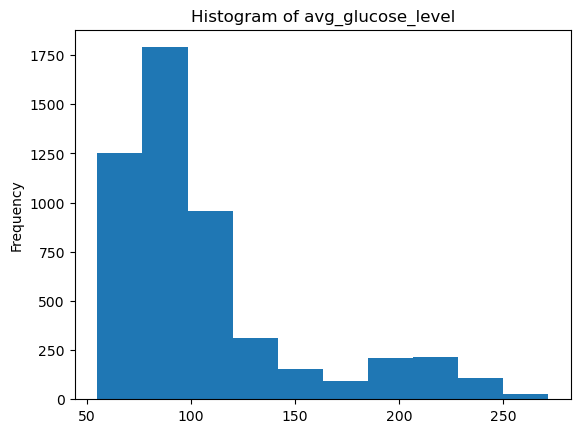

In [13]:
    # # avg_glucose_level for whole dataframe
    df['avg_glucose_level'].plot(kind='hist')
    plt.title('Histogram of avg_glucose_level')

The distribution of average glucose levels shows noticeable differences between the original dataset and the subset with missing BMI values. Notably, 4 percent of the data is missing, and this missingness does not appear to be random. To address this, it's advisable to retain the records with missing BMI values. However, adding a new column to indicate whether the BMI is missing could be beneficial for machine learning methods. This approach allows us to maintain data integrity while providing a clear indicator for our models to handle these missing values appropriately.

In [14]:
# deal with missing data
df['missing bmi'] = df['bmi'].isna()

In [15]:
df['bmi'].isna().sum()

201

In [16]:
#check for duplicate rows
df.duplicated().sum()

0

There is no duplicated record in the data set

In [17]:
# fill missing data with median
df['bmi'] = df['bmi'].fillna(round (df['bmi'].median(), 2))

In [18]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
missing bmi          0
dtype: int64

In [19]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,missing bmi
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,False
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,True
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,False
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,False
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,False


# Dataset Overview

Our dataset contains a mix of categorical and numerical features, with a focus on health-related measurements. Here's a breakdown of the features:

## Categorical Features
- `gender`: Gender of the individual
- `ever_married`: Marital status
- `work_type`: Type of occupation
- `Residence_type`: Type of residence (Urban/Rural)
- `smoking_status`: Smoking status

## Binary Numerical Features
- `hypertension`: Presence of hypertension (0 = No, 1 = Yes)
- `heart_disease`: Presence of heart disease (0 = No, 1 = Yes)
- `stroke`: Occurrence of stroke (0 = No, 1 = Yes)

## Continuous Numerical Features
- `age`: Age of the individual
- `avg_glucose_level`: Average glucose level in blood
- `bmi`: Body Mass Index

**Note**: The `bmi` feature has missing data that needs to be addressed. Most of our data is categorical, which will require special attention for visualization. For feature extraction, we can consider binning the continuous features (age, avg_glucose_level, and bmi) while keeping other features as they are.


### Story telling with data

### Data Binning Strategies

In our analysis, we'll be binning several key variables to categorize our data more effectively. Below are the binning strategies for Body Mass Index (BMI), age, and average glucose levels, along with references for each categorization method.

#### Body Mass Index (BMI) Binning

BMI is a key health indicator used to categorize individuals into different weight statuses. The binning of BMI will be based on standard medical categories. 

Reference: [Body Mass Index Categories](https://www.medicalnewstoday.com/articles/323446#body-mass-index)

#### Age Binning

Categorizing individuals into different life stages based on age can be particularly relevant in studies where age is a significant factor.

Reference: [Age and Physical Description](https://kidspicturedictionary.com/english-through-pictures/people-english-through-pictures/age-physical-description/)

#### Average Glucose Level Binning

Binning average glucose levels helps in categorizing individuals based on their blood sugar levels, crucial in studies related to diabetes and metabolic health.

Reference: [Normal Blood Sugar Level Chart](https://agamatrix.com/blog/normal-blood-sugar-level-chart/)


In [20]:
# Binning continuous features for better categorization
df['age_category'] = pd.cut(df['age'], bins=[0, 18, 35, 60, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
df['glucose_category'] = pd.cut(df['avg_glucose_level'], bins=[0, 90, 140, 200, 500], labels=['Low', 'Normal', 'High', 'Very High'])
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Display the first few rows of the modified DataFrame
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,missing bmi,age_category,glucose_category,bmi_category
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,False,Senior,Very High,Obese
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,True,Senior,Very High,Overweight
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,False,Senior,Normal,Obese
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,False,Adult,High,Obese
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,False,Senior,High,Normal


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   object  
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   int64   
 4   heart_disease      5110 non-null   int64   
 5   ever_married       5110 non-null   object  
 6   work_type          5110 non-null   object  
 7   Residence_type     5110 non-null   object  
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                5110 non-null   float64 
 10  smoking_status     5110 non-null   object  
 11  stroke             5110 non-null   int64   
 12  missing bmi        5110 non-null   bool    
 13  age_category       5110 non-null   category
 14  glucose_category   5110 non-null   category
 15  bmi_category       5110 non-null   category
dtypes: boo

##### take a closer look at data with ratio of stroke

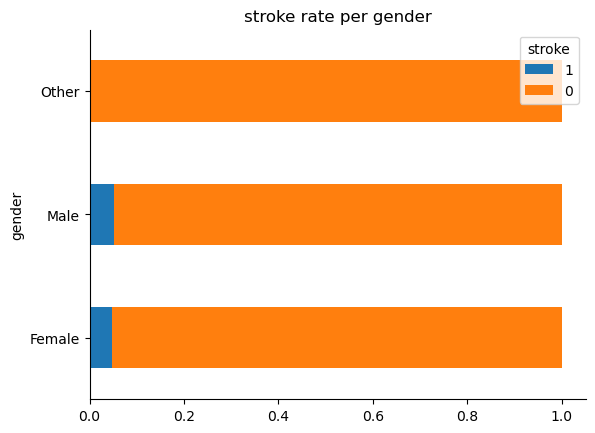

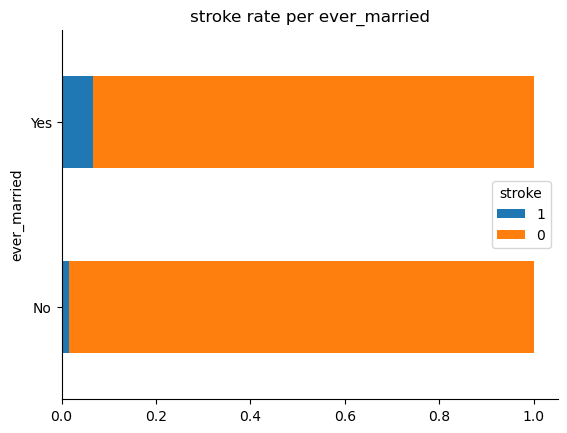

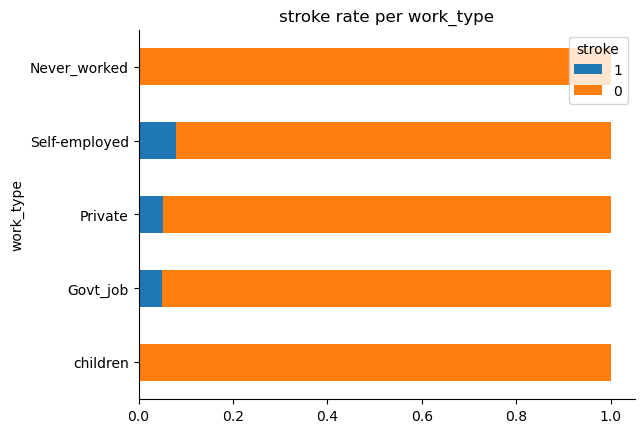

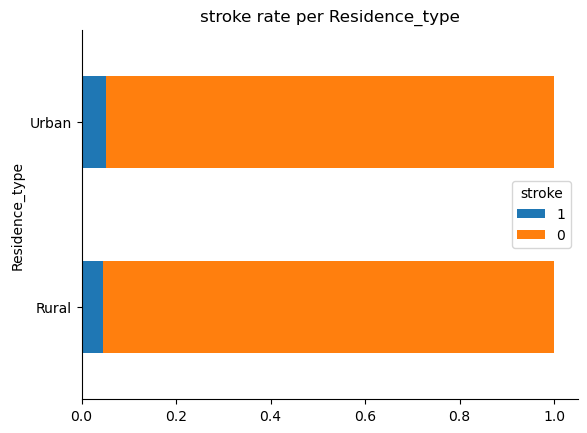

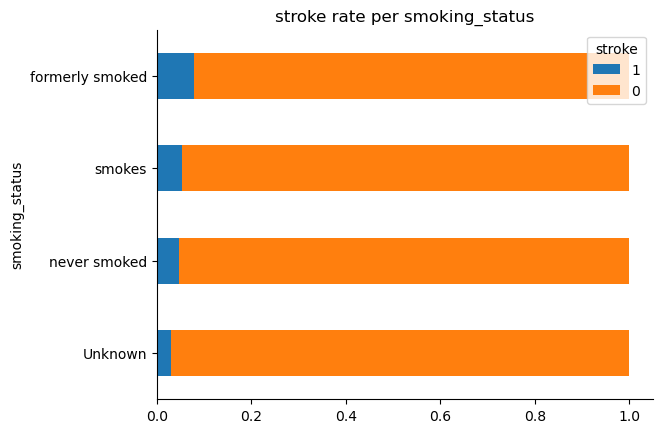

In [22]:
# visualization for columns with object data type
for col in df.select_dtypes('object').columns:
    rate_data = df.groupby([col,'stroke'])['stroke'].count() / df.groupby(col)['stroke'].count()
    
    rate_data.unstack()[[1,0]].sort_values(1).plot(kind='barh',stacked=True)
    plt.title(f"stroke rate per {col}")
    sns.despine()
    plt.show()
    

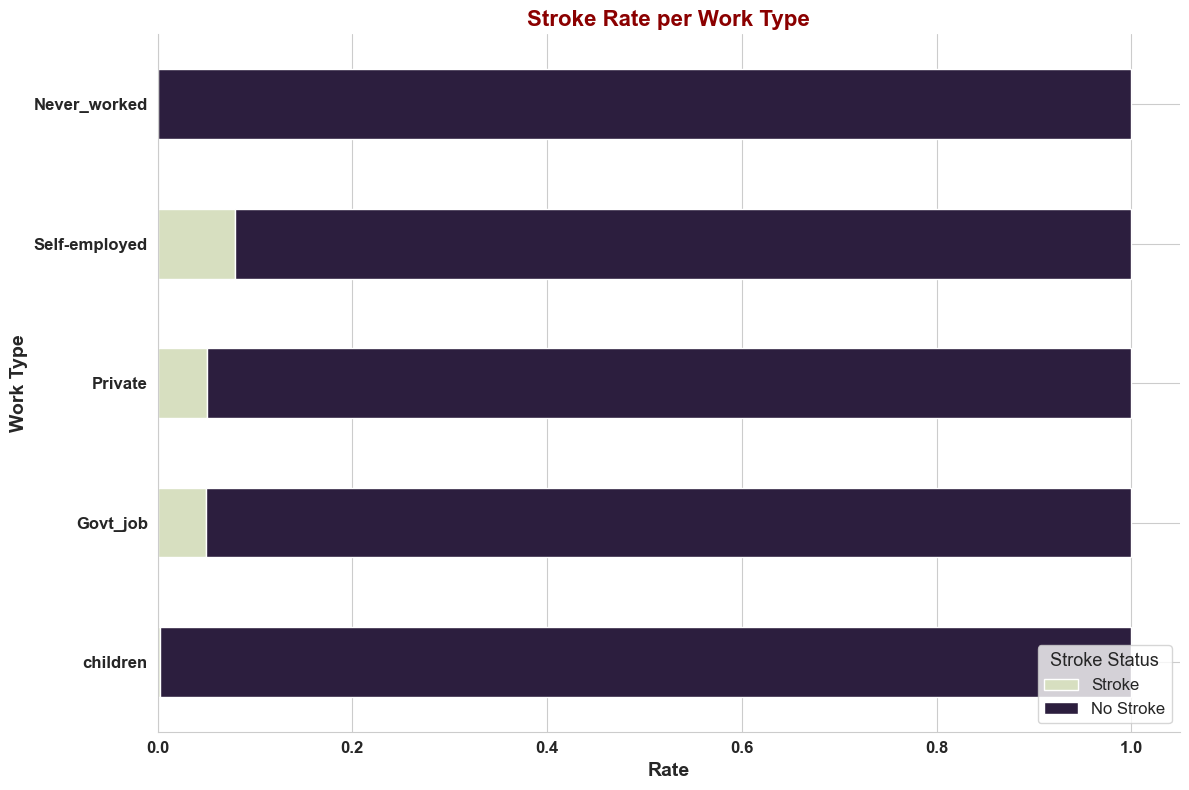

In [23]:

col = 'Work Type'  # Replace with the actual column name if different

# Calculate the rate
rate_data = df.groupby(['work_type', 'stroke'])['stroke'].count() / df.groupby('work_type')['stroke'].count()

# Unstack and sort the data
sorted_data = rate_data.unstack().sort_values(by=1)[[1, 0]]

# Setting up the plot style and palette
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.set_style("whitegrid")  # Set the style of the plot
palette = sns.cubehelix_palette(2, start=.5, rot=-.75)  # Advanced color palette

# Plotting
sorted_data.plot(kind='barh', stacked=True, color=palette, ax=plt.gca())

# Adding title and labels with enhanced formatting
plt.title(f"Stroke Rate per {col}", fontsize=16, fontweight='bold', color='darkred')
plt.xlabel('Rate', fontsize=14, fontweight='bold')
plt.ylabel('Work Type', fontsize=14, fontweight='bold')

# Customizing the legend
plt.legend(title='Stroke Status', labels=['Stroke', 'No Stroke'], loc='lower right', fontsize='large', title_fontsize='13')

# Customizing the ticks for better readability
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

sns.despine()  # Remove the top and right spines
plt.tight_layout()  # Adjust the layout
plt.show()



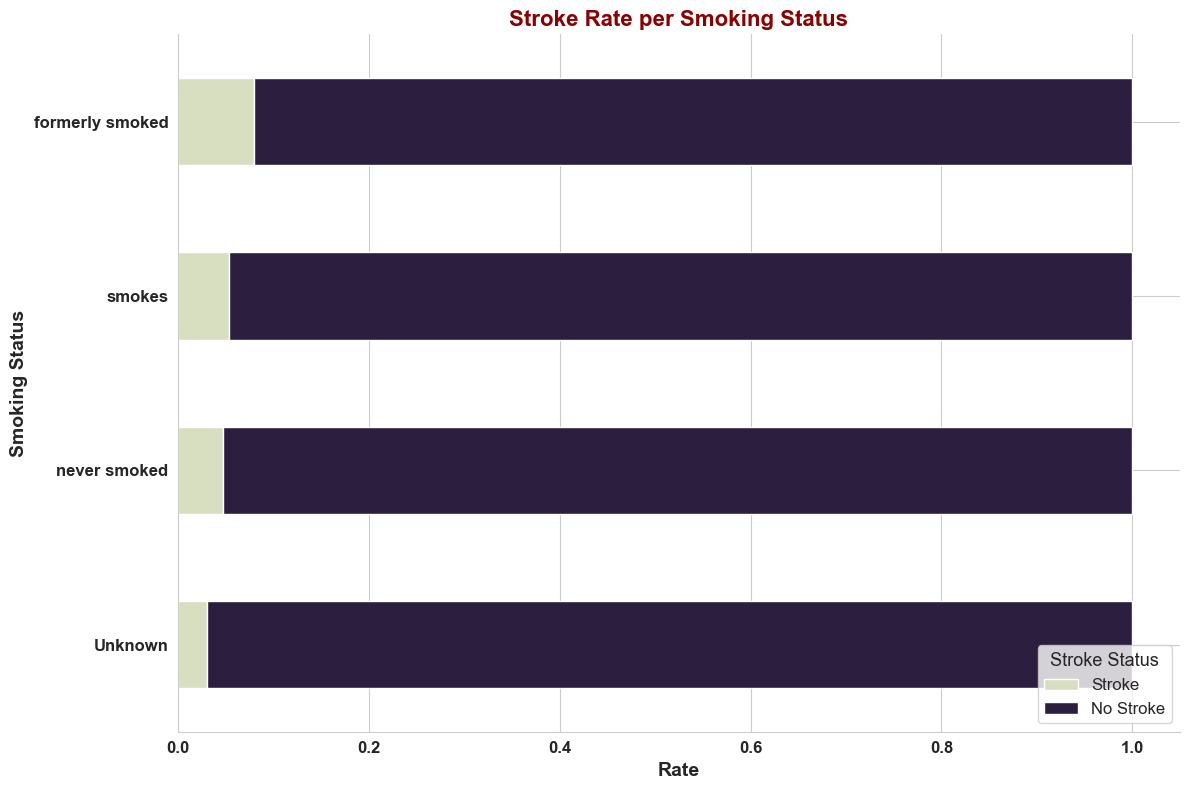

In [24]:

col = 'Smoking Status'

# Calculate the rate for Smoking Status
rate_data = df.groupby(['smoking_status', 'stroke'])['stroke'].count() / df.groupby('smoking_status')['stroke'].count()

# Unstack and sort the data
sorted_data = rate_data.unstack().sort_values(by=1)[[1, 0]]

# Setting up the plot style and palette
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.set_style("whitegrid")  # Set the style of the plot
palette = sns.cubehelix_palette(2, start=.5, rot=-.75)  # Advanced color palette

# Plotting
sorted_data.plot(kind='barh', stacked=True, color=palette, ax=plt.gca())

# Adding title and labels with enhanced formatting
plt.title(f"Stroke Rate per {col}", fontsize=16, fontweight='bold', color='darkred')
plt.xlabel('Rate', fontsize=14, fontweight='bold')
plt.ylabel('Smoking Status', fontsize=14, fontweight='bold')

# Customizing the legend
plt.legend(title='Stroke Status', labels=['Stroke', 'No Stroke'], loc='lower right', fontsize='large', title_fontsize='13')

# Customizing the ticks for better readability
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

sns.despine()  # Remove the top and right spines
plt.tight_layout()  # Adjust the layout
plt.show()



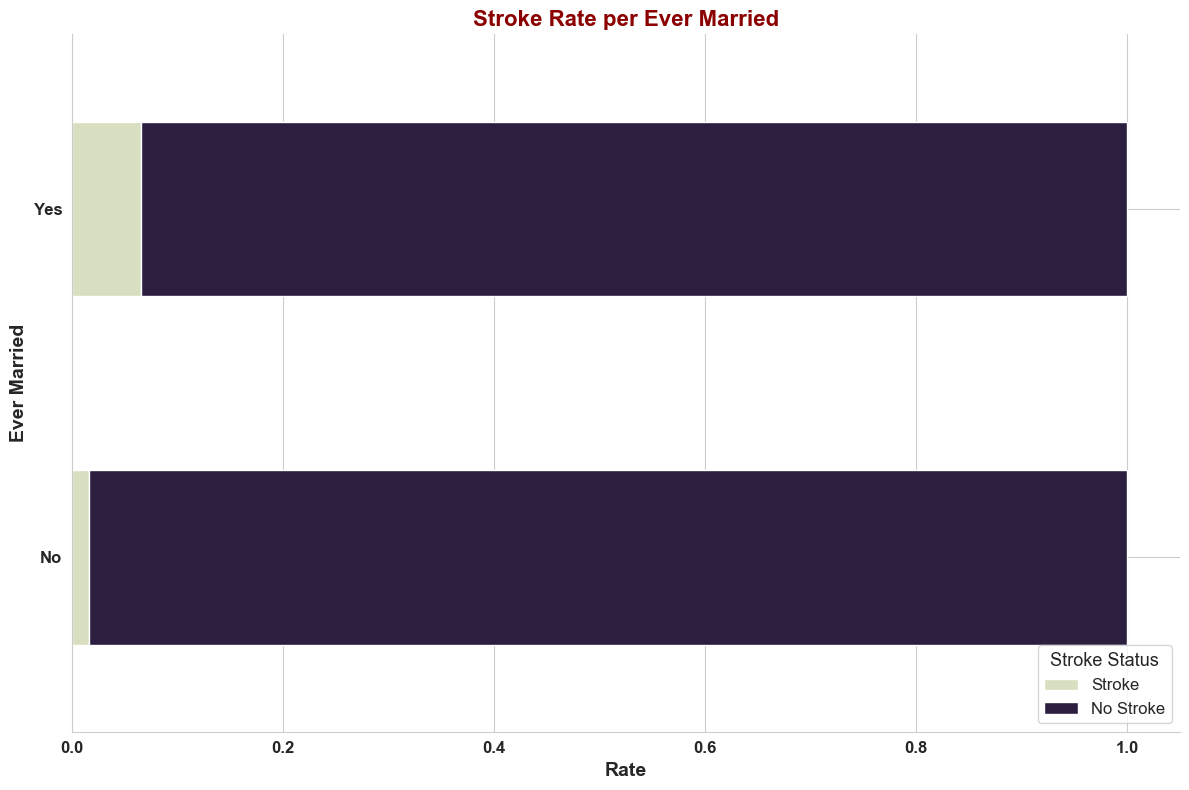

In [25]:


col = 'Ever Married'

# Calculate the rate for Ever Married status
rate_data = df.groupby(['ever_married', 'stroke'])['stroke'].count() / df.groupby('ever_married')['stroke'].count()

# Unstack and sort the data
sorted_data = rate_data.unstack().sort_values(by=1)[[1, 0]]

# Setting up the plot style and palette
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.set_style("whitegrid")  # Set the style of the plot
palette = sns.cubehelix_palette(2, start=.5, rot=-.75)  # Advanced color palette

# Plotting
sorted_data.plot(kind='barh', stacked=True, color=palette, ax=plt.gca())

# Adding title and labels with enhanced formatting
plt.title(f"Stroke Rate per {col}", fontsize=16, fontweight='bold', color='darkred')
plt.xlabel('Rate', fontsize=14, fontweight='bold')
plt.ylabel('Ever Married', fontsize=14, fontweight='bold')

# Customizing the legend
plt.legend(title='Stroke Status', labels=['Stroke', 'No Stroke'], loc='lower right', fontsize='large', title_fontsize='13')

# Customizing the ticks for better readability
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

sns.despine()  # Remove the top and right spines
plt.tight_layout()  # Adjust the layout
plt.show()


C:\Users\azarb\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\azarb\AppData\Local\Temp\ipykernel_16676\945759690.py:29: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the layout


<Figure size 1200x800 with 0 Axes>

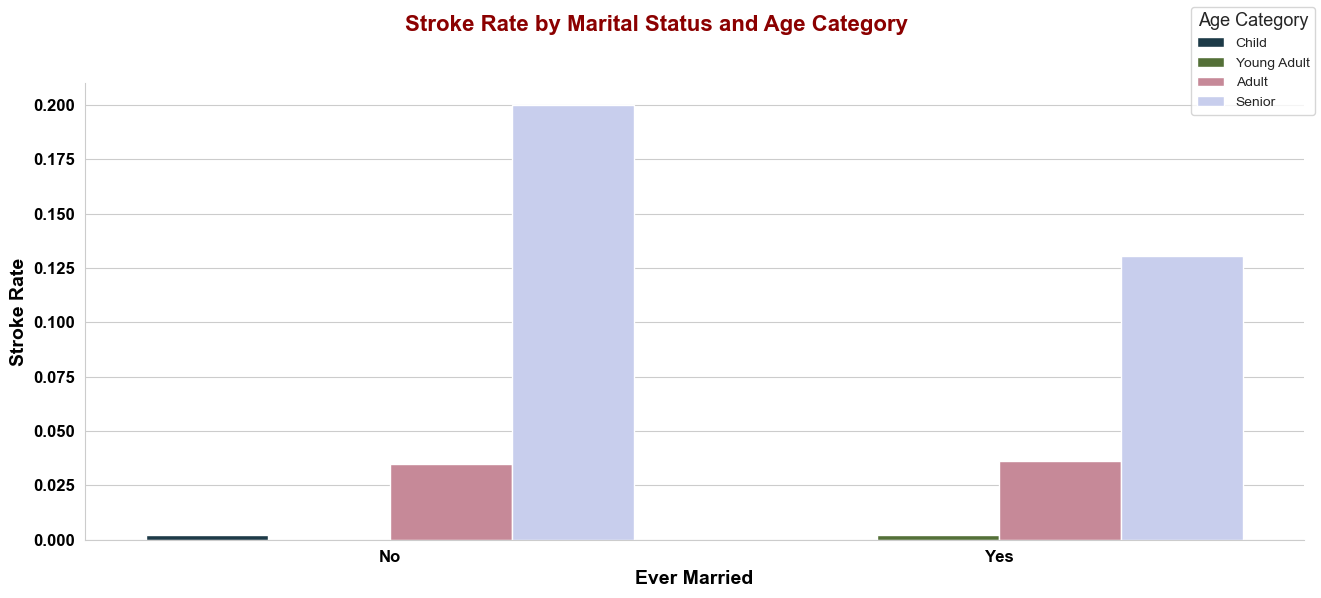

In [26]:

# Calculate the rate
rate_data = df.groupby(['ever_married', 'age_category', 'stroke']).size() / df.groupby(['ever_married', 'age_category']).size()
rate_data = rate_data.reset_index(name='rate')

# Filter for stroke cases only
stroke_rate_data = rate_data[rate_data['stroke'] == 1]

# Setting up the plot style for minimalism
sns.set_style("whitegrid")  # White background with grid for a clean look
plt.figure(figsize=(12, 8))  # Adjust the size as needed

# Plotting with age category hue
bar_plot = sns.catplot(x='ever_married', y='rate', hue='age_category', data=stroke_rate_data, kind='bar', palette='cubehelix', height=6, aspect=2)

# Adding title and labels with enhanced formatting
bar_plot.fig.suptitle("Stroke Rate by Marital Status and Age Category", fontsize=16, fontweight='bold', color='darkred')
bar_plot.set_axis_labels("Ever Married", "Stroke Rate", fontsize=14, fontweight='bold', color='black')

# Customizing the ticks for better readability
plt.xticks(fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')

# Adjusting the legend for minimalism
# Remove the existing legend and use the one automatically generated by Seaborn
bar_plot._legend.remove()
bar_plot.fig.legend(title='Age Category', loc='upper right', fontsize='medium', title_fontsize='13')

sns.despine()  # Remove the top and right spines for a cleaner look
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the layout
plt.show()



In [27]:
df['age_category'].value_counts()

age_category
Adult          1907
Senior         1304
Young Adult     983
Child           916
Name: count, dtype: int64

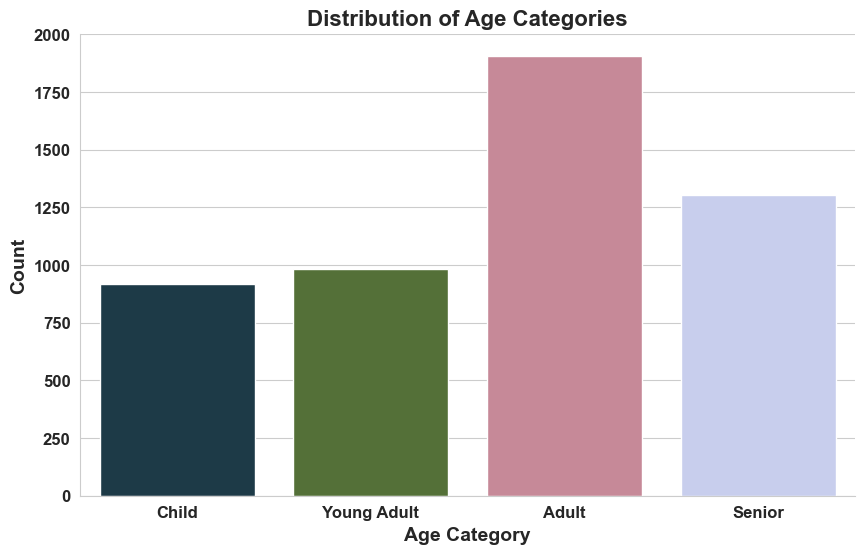

In [28]:

age_category_counts = df['age_category'].value_counts()

# Setting up the plot style
sns.set_style("whitegrid")

# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=age_category_counts.index, y=age_category_counts.values, palette='cubehelix')

# Adding title and labels
plt.title('Distribution of Age Categories', fontsize=16, fontweight='bold')
plt.xlabel('Age Category', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# Customizing the ticks for better readability
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

sns.despine()  # Remove the top and right spines for a cleaner look
plt.show()


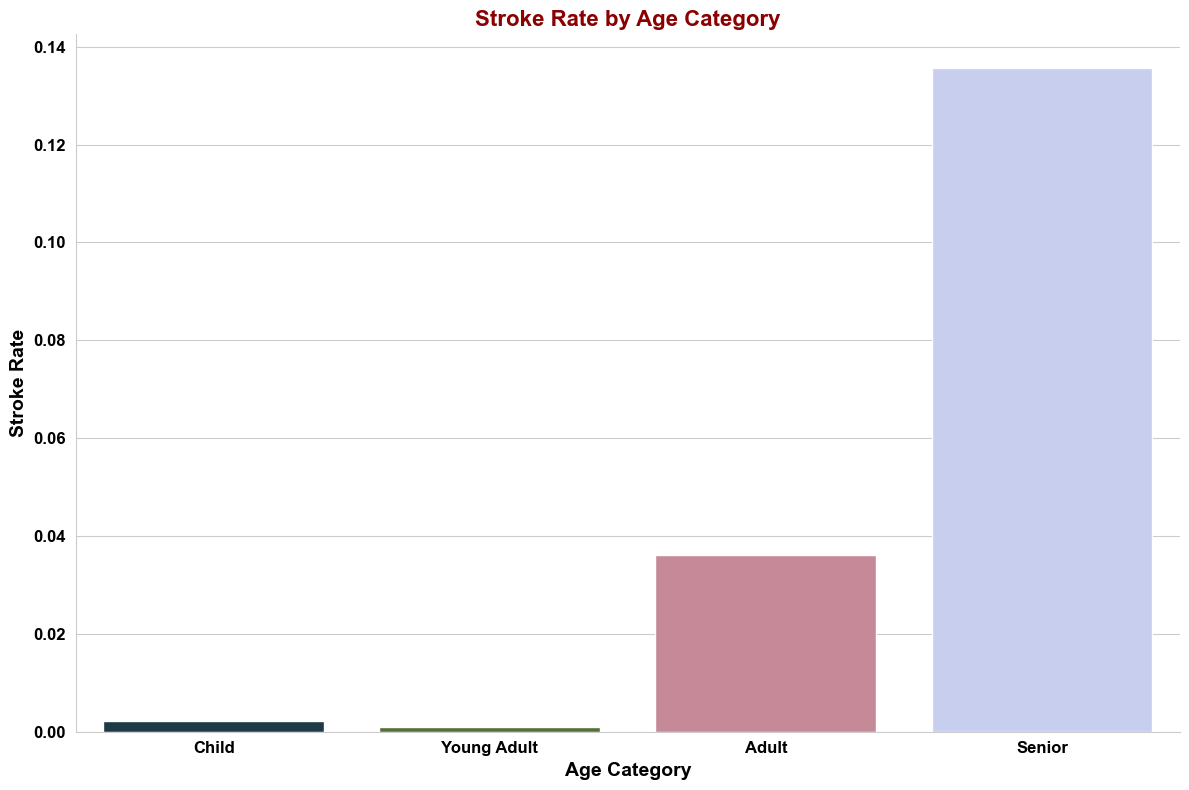

In [29]:

# Calculate the rate by age category
rate_data = df.groupby(['age_category', 'stroke']).size() / df.groupby('age_category').size()
rate_data = rate_data.reset_index(name='rate')

# Filter for stroke cases only
stroke_rate_data = rate_data[rate_data['stroke'] == 1]

# Setting up the plot style for minimalism
sns.set_style("whitegrid")  # White background with grid for a clean look
plt.figure(figsize=(12, 8))  # Adjust the size as needed

# Plotting the stroke rate by age category
bar_plot = sns.barplot(x='age_category', y='rate', data=stroke_rate_data, palette='cubehelix')

# Adding title and labels with enhanced formatting
plt.title("Stroke Rate by Age Category", fontsize=16, fontweight='bold', color='darkred')
plt.xlabel('Age Category', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Stroke Rate', fontsize=14, fontweight='bold', color='black')

# Customizing the ticks for better readability
plt.xticks(fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')

sns.despine()  # Remove the top and right spines for a cleaner look
plt.tight_layout()  # Adjust the layout
plt.show()


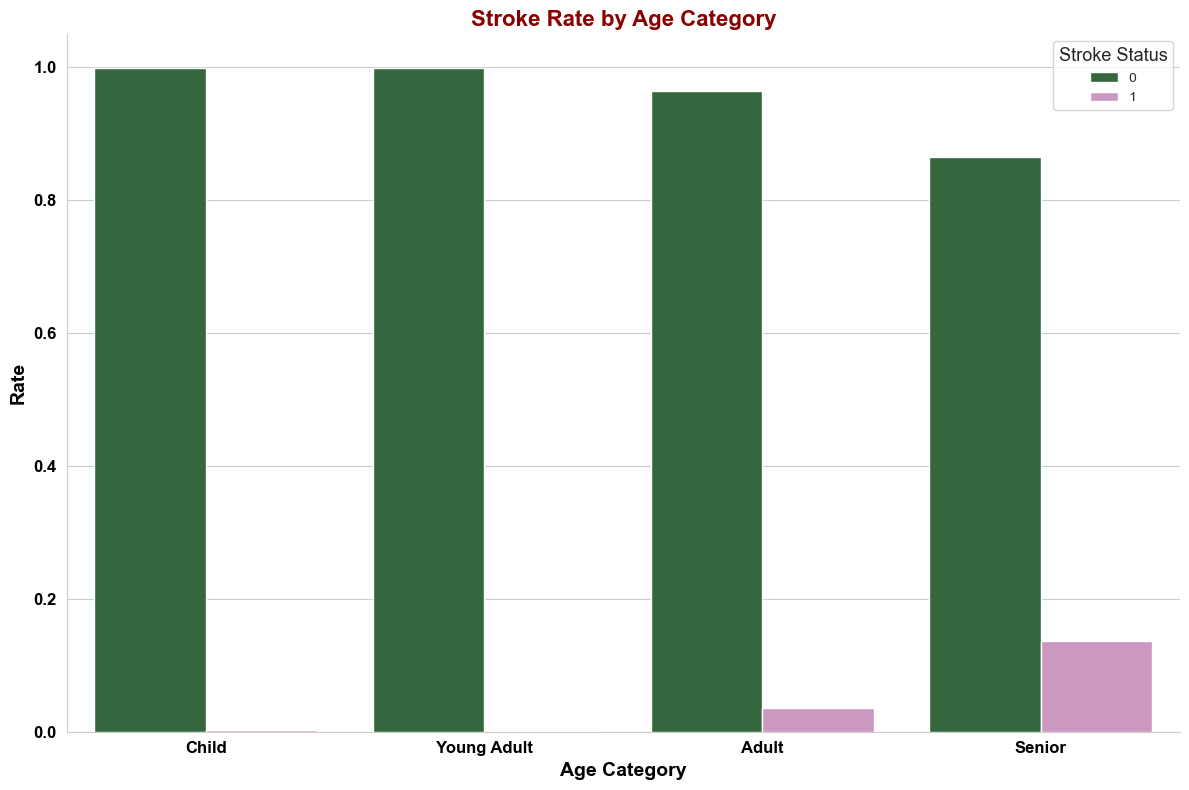

In [30]:

# Calculate the rate by age category and stroke status
rate_data = df.groupby(['age_category', 'stroke']).size() / df.groupby('age_category').size()
rate_data = rate_data.reset_index(name='rate')

# Setting up the plot style for minimalism
sns.set_style("whitegrid")  # White background with grid for a clean look
plt.figure(figsize=(12, 8))  # Adjust the size as needed

# Plotting the stroke rate by age category with stroke hue
bar_plot = sns.barplot(x='age_category', y='rate', hue='stroke', data=rate_data, palette='cubehelix')

# Adding title and labels with enhanced formatting
plt.title("Stroke Rate by Age Category", fontsize=16, fontweight='bold', color='darkred')
plt.xlabel('Age Category', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Rate', fontsize=14, fontweight='bold', color='black')

# Customizing the ticks for better readability
plt.xticks(fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')

# Adjusting the legend for minimalism
plt.legend(title='Stroke Status', loc='upper right', fontsize='medium', title_fontsize='13')

sns.despine()  # Remove the top and right spines for a cleaner look
plt.tight_layout()  # Adjust the layout
plt.show()


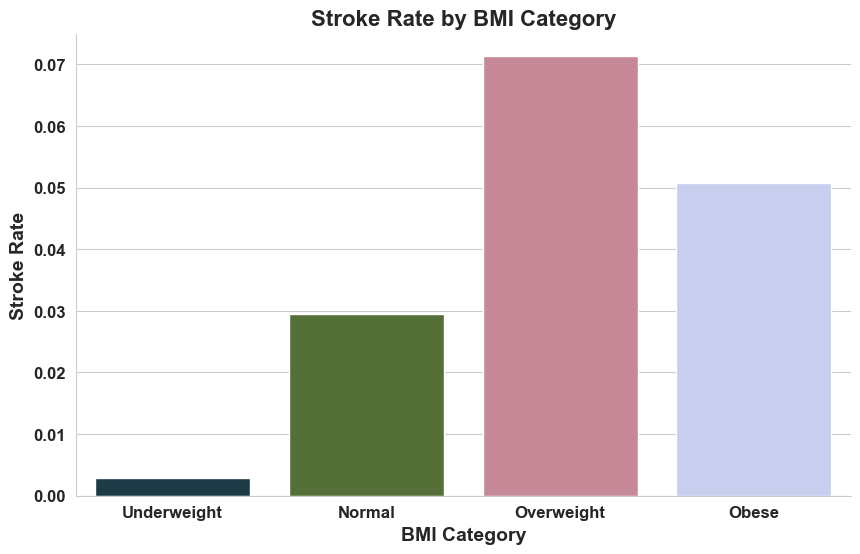

In [31]:
# Calculate the stroke rate per BMI category
rate_data = df.groupby(['bmi_category', 'stroke']).size() / df.groupby('bmi_category').size()
rate_data = rate_data.reset_index(name='rate')

# Filter for stroke cases only
stroke_rate_data = rate_data[rate_data['stroke'] == 1]

# Setting up the plot style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Plotting the stroke rate by BMI category
sns.barplot(x='bmi_category', y='rate', data=stroke_rate_data, palette='cubehelix')

# Adding title and labels
plt.title('Stroke Rate by BMI Category', fontsize=16, fontweight='bold')
plt.xlabel('BMI Category', fontsize=14, fontweight='bold')
plt.ylabel('Stroke Rate', fontsize=14, fontweight='bold')

# Customizing the ticks for better readability
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

sns.despine()  # Remove the top and right spines for a cleaner look
plt.show()

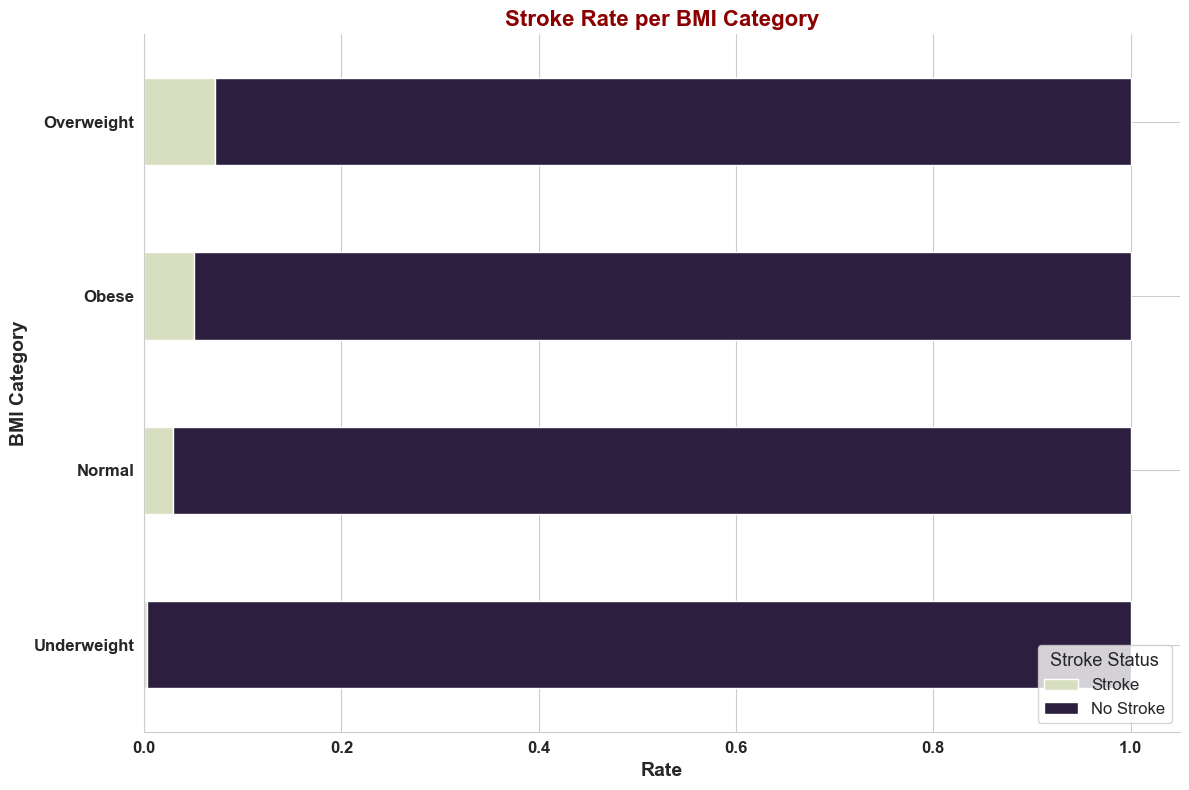

In [32]:

# Calculate the rate
rate_data = df.groupby(['bmi_category', 'stroke'])['stroke'].count() / df.groupby('bmi_category')['stroke'].count()

# Unstack and sort the data
sorted_data = rate_data.unstack().sort_values(by=1)[[1, 0]]

# Setting up the plot style and palette
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.set_style("whitegrid")  # Set the style of the plot
palette = sns.cubehelix_palette(2, start=.5, rot=-.75)  # Advanced color palette

# Plotting
sorted_data.plot(kind='barh', stacked=True, color=palette, ax=plt.gca())

# Adding title and labels with enhanced formatting
plt.title("Stroke Rate per BMI Category", fontsize=16, fontweight='bold', color='darkred')
plt.xlabel('Rate', fontsize=14, fontweight='bold')
plt.ylabel('BMI Category', fontsize=14, fontweight='bold')

# Customizing the legend
plt.legend(title='Stroke Status', labels=['Stroke', 'No Stroke'], loc='lower right', fontsize='large', title_fontsize='13')

# Customizing the ticks for better readability
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

sns.despine()  # Remove the top and right spines
plt.tight_layout()  # Adjust the layout
plt.show()


In [33]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,missing bmi,age_category,glucose_category,bmi_category
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,False,Senior,Very High,Obese
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,True,Senior,Very High,Overweight
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,False,Senior,Normal,Obese
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,False,Adult,High,Obese
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,False,Senior,High,Normal


##### now for numeric data

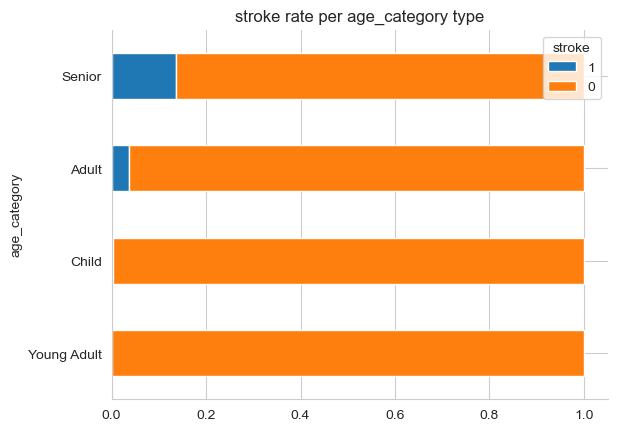

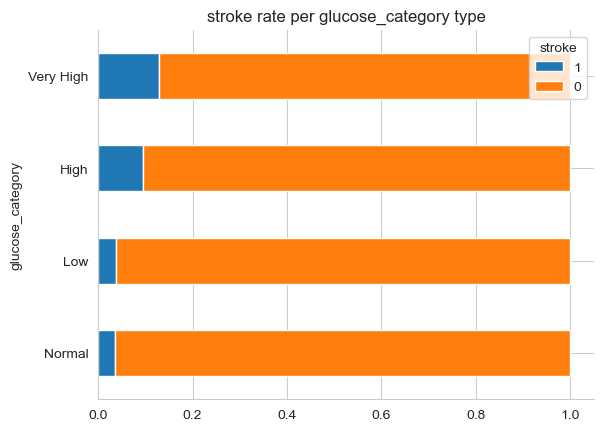

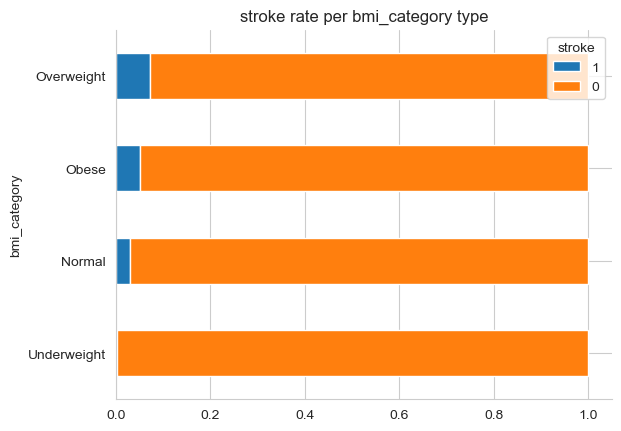

In [34]:
#  visaalization for columns with category data type
for col in df.select_dtypes('category').columns:
    rate_data = df.groupby([col,'stroke'])['stroke'].count() / df.groupby(col)['stroke'].count()
    
    rate_data.unstack()[[1,0]].sort_values(1).plot(kind='barh',stacked=True)
    plt.title(f"stroke rate per {col} type")
    sns.despine()
    plt.show()

Does marriage and glucose result in a higher incidence of stroke? Considering that children are typically unmarried, we will demonstrate analysis on adults and seniors to examine the stroke ratio in relation to marital status

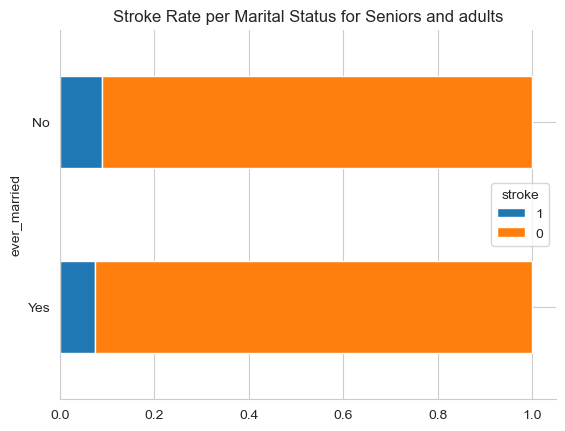

In [35]:
# Filter the DataFrame for seniors and adults
senior_df = df[df['age_category'].isin(['Senior', 'Adult'])]

# Calculate the rate
rate_data = senior_df.groupby(['ever_married', 'stroke'])['stroke'].count() / senior_df.groupby('ever_married')['stroke'].count()

# Unstack, sort, and plot
rate_data.unstack().sort_values(by=1)[[1, 0]].plot(kind='barh', stacked=True)
plt.title("Stroke Rate per Marital Status for Seniors and adults")
sns.despine()
plt.show()

As the visual analysis indicates, the ratio of stroke incidence among adults and seniors appears to be similar for both married and unmarried groups.

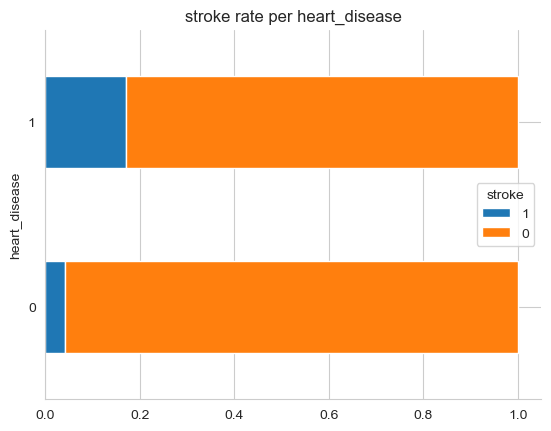

In [36]:
#visualization with numeric data type (heart disease)
rate_data = df.groupby(['heart_disease','stroke'])['stroke'].count() / df.groupby('heart_disease')['stroke'].count()
    
rate_data.unstack()[[1,0]].sort_values(1).plot(kind='barh',stacked=True)
plt.title(f"stroke rate per heart_disease")
sns.despine()
plt.show()

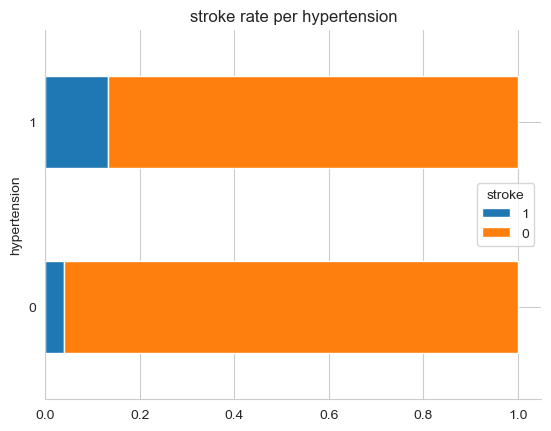

In [37]:
#visualization with numeric data type (hypertension)
rate_data = df.groupby(['hypertension','stroke'])['stroke'].count() / df.groupby('hypertension')['stroke'].count()
    
rate_data.unstack()[[1,0]].sort_values(1).plot(kind='barh',stacked=True)
plt.title(f"stroke rate per hypertension")
sns.despine()
plt.show()

###### Let's examine the relationship between glucose levels and the incidence of stroke. Does a higher glucose level correlate with an increased risk of stroke?

C:\Users\azarb\AppData\Local\Temp\ipykernel_16676\3992349092.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['stroke'] == 0], x='avg_glucose_level', shade=True, alpha=1,label='No Stroke')
C:\Users\azarb\AppData\Local\Temp\ipykernel_16676\3992349092.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['stroke'] == 1], x='avg_glucose_level', shade=True, alpha=0.8, label='Stroke')


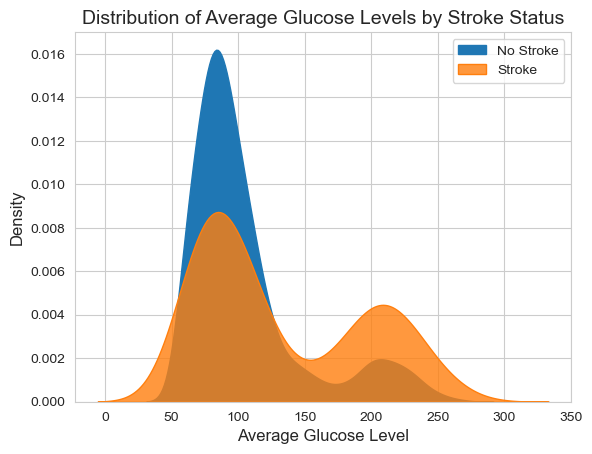

In [38]:
# Plotting the data
# 'No Stroke' group
sns.kdeplot(data=df[df['stroke'] == 0], x='avg_glucose_level', shade=True, alpha=1,label='No Stroke')
# 'Stroke' group
sns.kdeplot(data=df[df['stroke'] == 1], x='avg_glucose_level', shade=True, alpha=0.8, label='Stroke')

# Setting the title and labels
plt.title('Distribution of Average Glucose Levels by Stroke Status', fontsize=14)
plt.xlabel('Average Glucose Level', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Adding a legend to show which color corresponds to which group
plt.legend()

# Display the plot
plt.show()


Glucose level distribution is skewed towards left and most of the strokes can be seen people with regular glucose levels. we can NOT conclude Glucose does not have significant impact on strokes, and its unclear strokes are which group effected by strokes.

avg_glucose_level : High blood glucose is found in stroke cases. A value of 126+ has been observed alot.

C:\Users\azarb\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

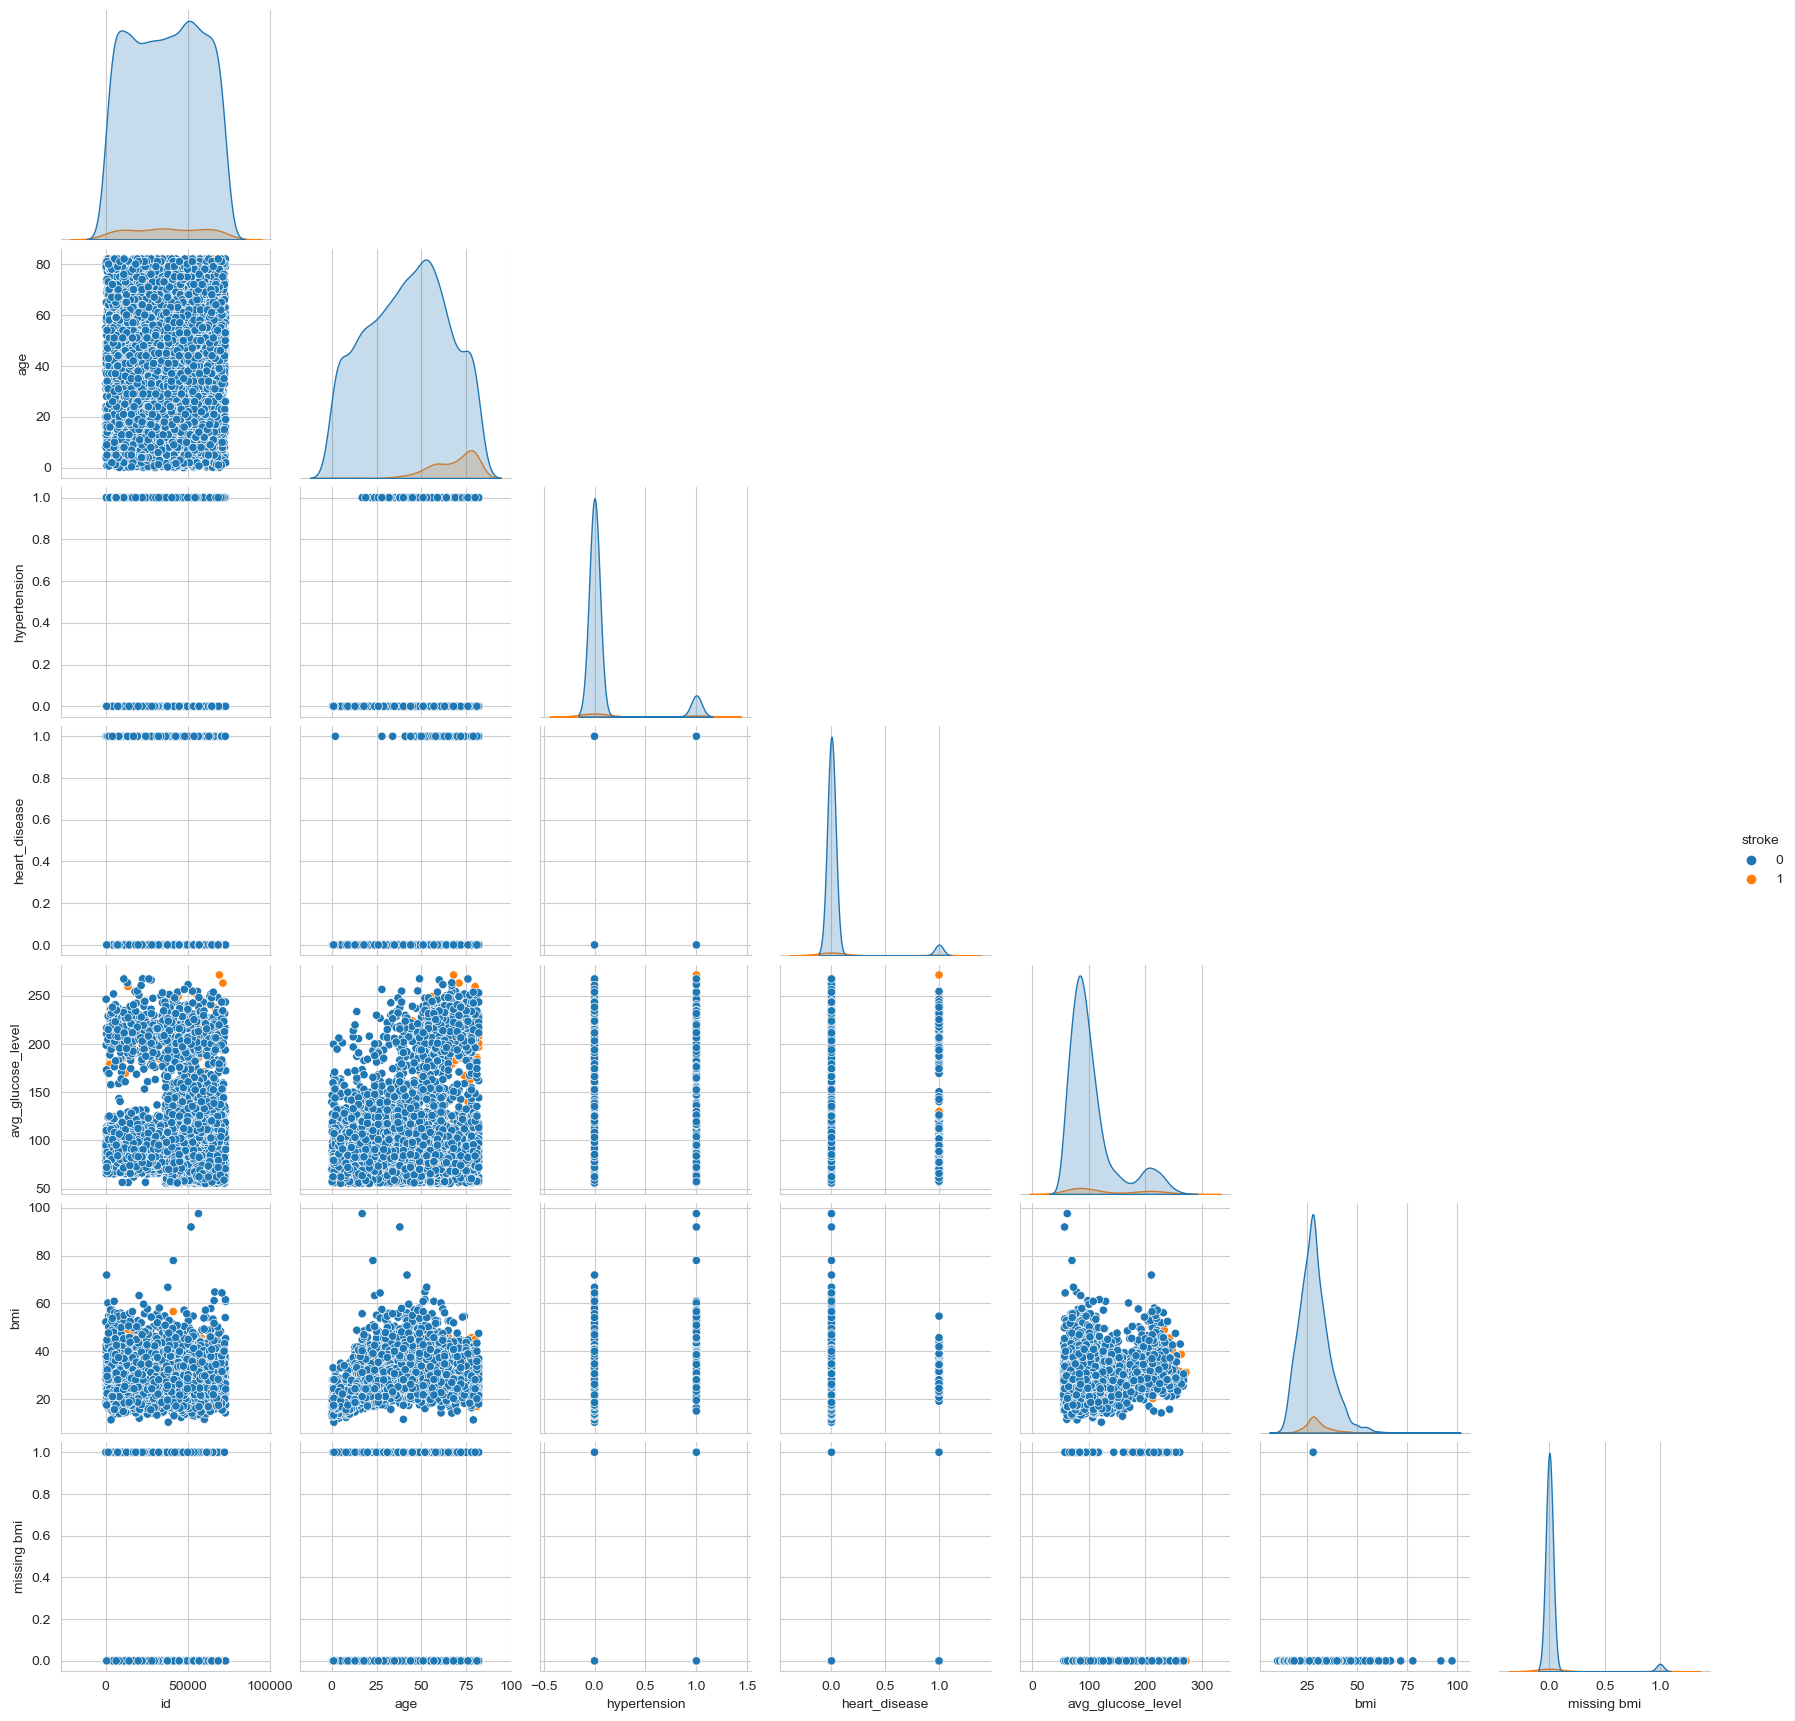

In [39]:
plt.figure()
sns.pairplot(df,hue="stroke", corner=True)
plt.show()

### dive into machine learning

In [41]:
df_copy=df.copy()
df_copy

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,missing bmi,age_category,glucose_category,bmi_category
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,False,Senior,Very High,Obese
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,True,Senior,Very High,Overweight
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,False,Senior,Normal,Obese
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,False,Adult,High,Obese
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,False,Senior,High,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0,True,Senior,Low,Overweight
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,False,Senior,Normal,Obese
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,False,Young Adult,Low,Obese
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,False,Adult,High,Overweight


In [42]:
from sklearn.preprocessing import (StandardScaler,
                                   LabelEncoder,
                                   OneHotEncoder)

In [43]:
df_copy.drop(columns = ['id'],inplace=True)

In [44]:
# preprocessing - label enconding and numerical value scaling
ohe = OneHotEncoder()
ss = StandardScaler()
le = LabelEncoder()


In [45]:
## label encoding of ordinal categorical features
for col in df_copy.columns:
    df_copy[col] = le.fit_transform(df_copy[col])

In [46]:
X = df_copy.drop(columns=['stroke'])
y = df_copy['stroke'].copy()

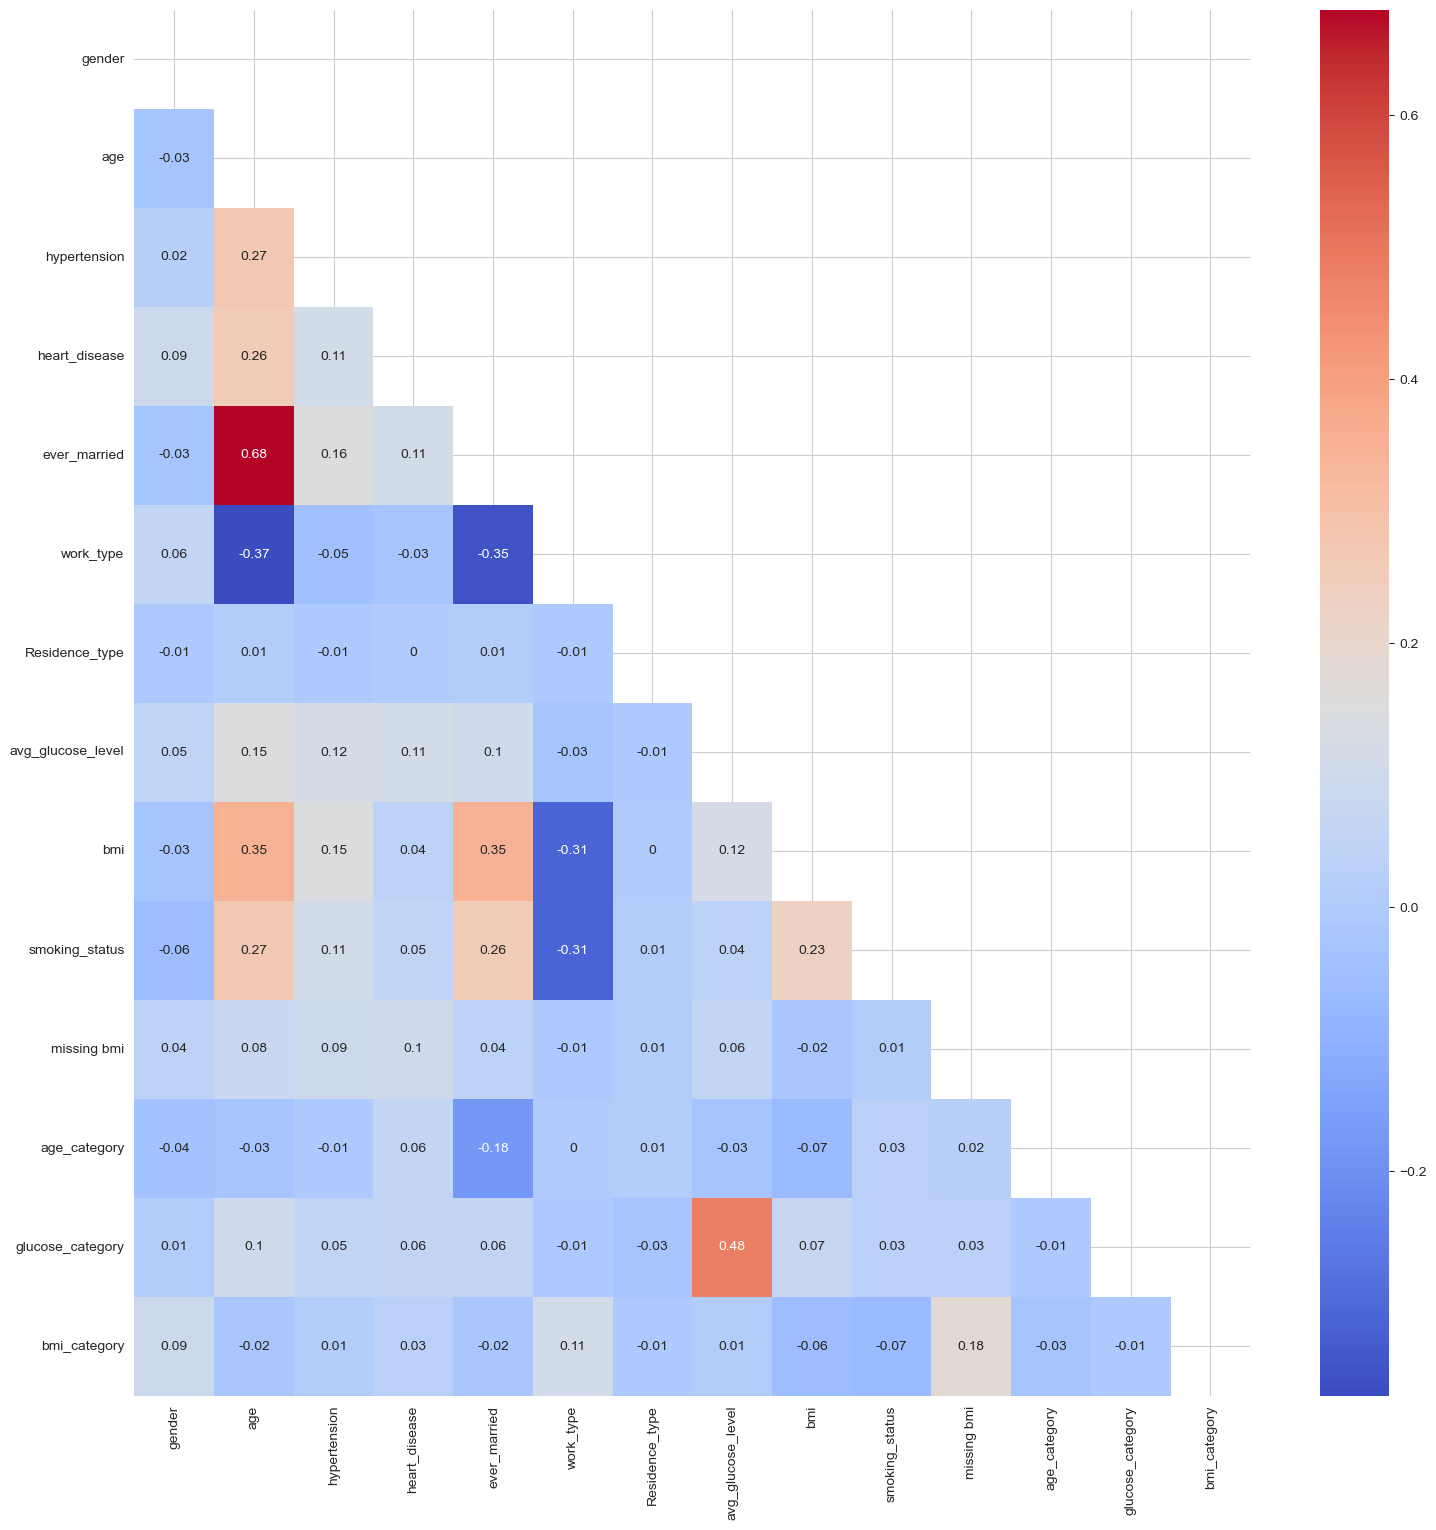

In [47]:
corr_df = X.corr()

mask = np.triu(corr_df)

plt.figure(figsize=(18, 18))
sns.heatmap(corr_df.round(2), mask=mask, cmap='coolwarm', annot=True)
plt.show()

###### check same for standard scaler

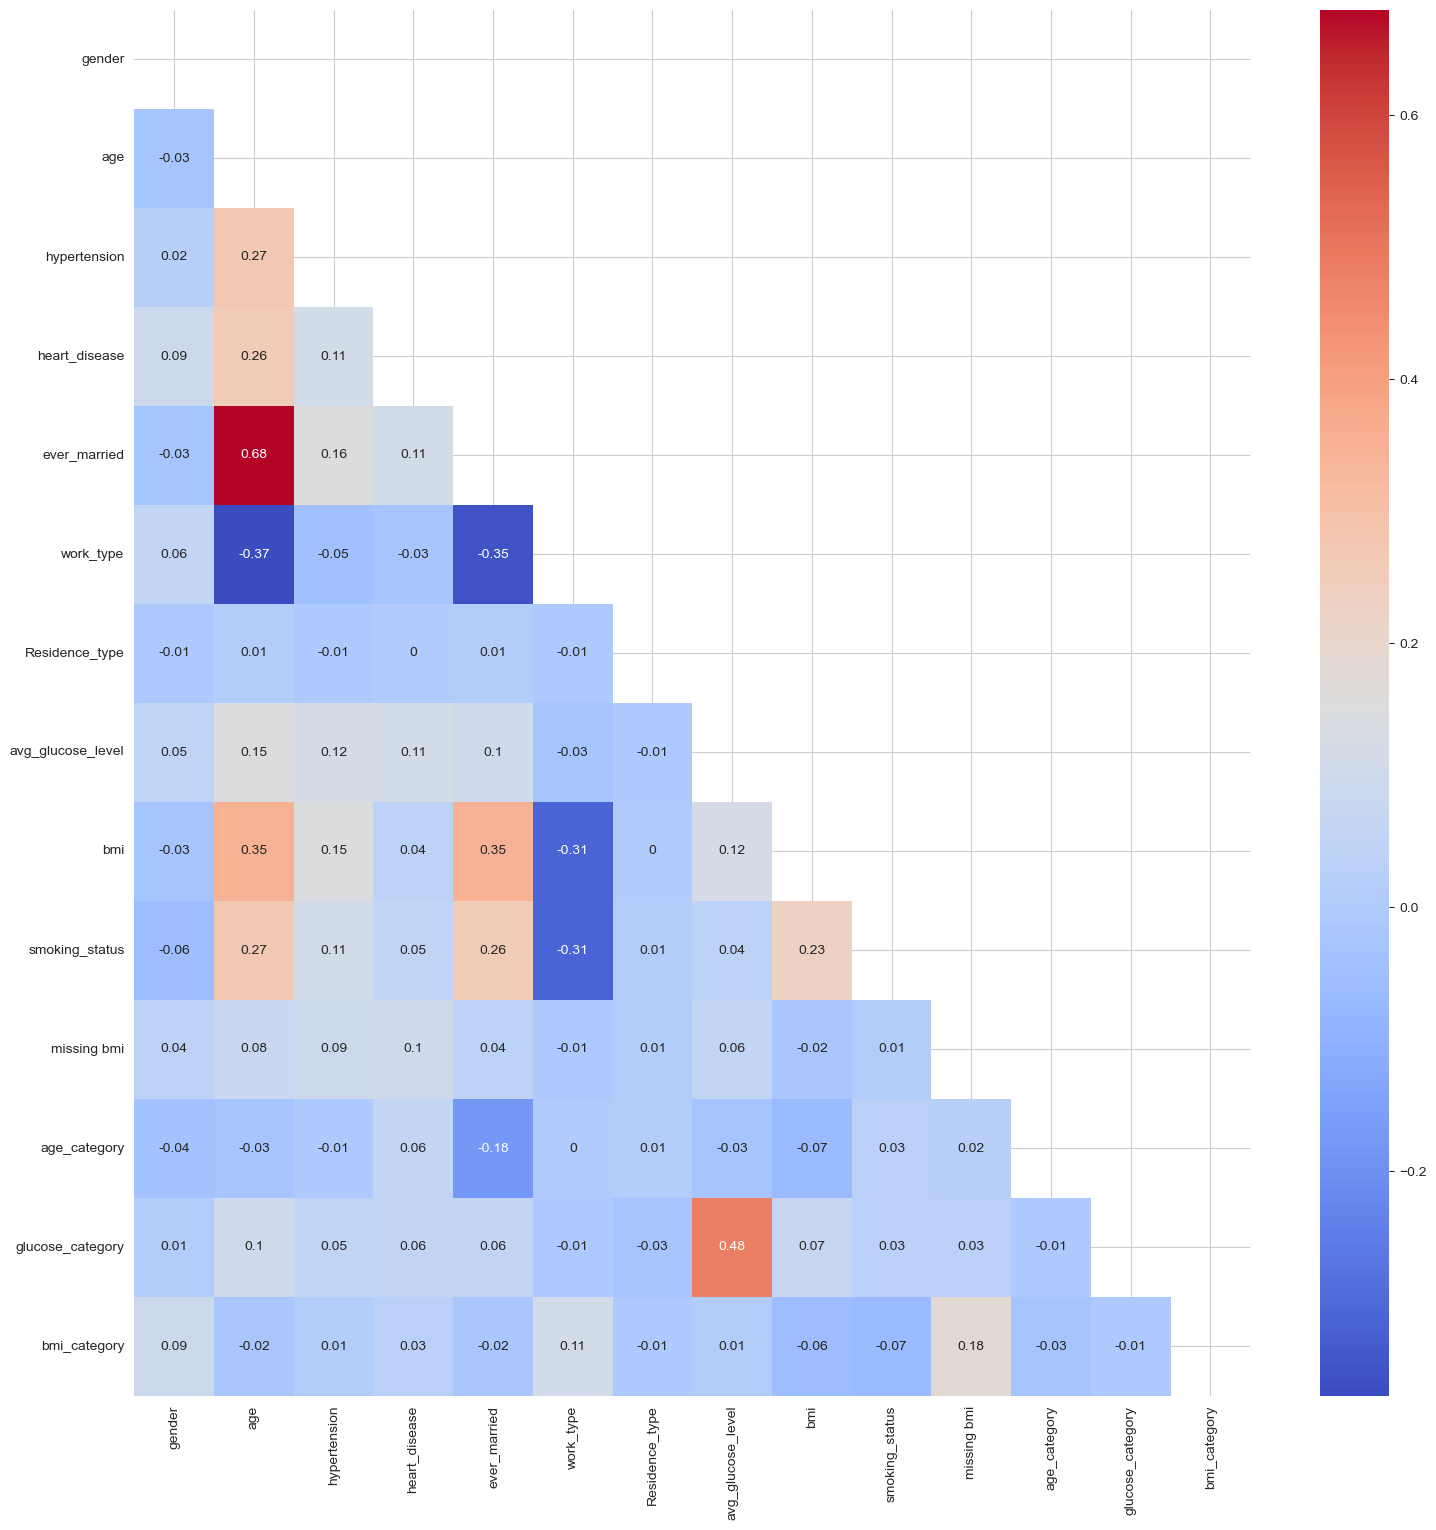

In [48]:
cols = df_copy.columns
## normalizing with standard scaler of numerical features
df_copy[cols] = ss.fit_transform(df_copy[cols])

X = df_copy.drop(columns=['stroke'])
y = df_copy['stroke'].copy()

corr_df = X.corr()

mask = np.triu(corr_df)

plt.figure(figsize=(18, 18))
sns.heatmap(corr_df.round(2), mask=mask, cmap='coolwarm', annot=True)
plt.show()

In [49]:
df_copy.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,missing bmi,age_category,glucose_category,bmi_category
0,1.188073,1.039513,-0.328602,4.185032,0.723884,-0.153836,0.984080,1.780170,1.062020,-0.351781,4.418381,-0.202349,0.636614,2.036140,-0.230858
1,-0.840344,0.779567,-0.328602,-0.238947,0.723884,0.763438,-1.016178,1.543029,-0.092500,0.581552,4.418381,4.941952,0.636614,2.036140,0.892652
2,1.188073,1.602729,-0.328602,4.185032,0.723884,-0.153836,-1.016178,0.542872,0.505134,0.581552,4.418381,-0.202349,0.636614,0.711547,-0.230858
3,-0.840344,0.259675,-0.328602,-0.238947,0.723884,-0.153836,0.984080,1.359290,0.763203,1.514885,4.418381,-0.202349,-1.099760,-1.937638,-0.230858
4,-0.840344,1.559405,3.043196,-0.238947,0.723884,0.763438,-1.016178,1.367436,-0.649386,0.581552,4.418381,-0.202349,0.636614,-1.937638,-1.354368


In [50]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,missing bmi,age_category,glucose_category,bmi_category
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,False,Senior,Very High,Obese
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,True,Senior,Very High,Overweight
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,False,Senior,Normal,Obese
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,False,Adult,High,Obese
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,False,Senior,High,Normal


In [51]:
df_copy1 = df.copy()

### Now we can apply feature engineering on df_copy1

In [52]:
df_copy1.drop(columns = ['id'],inplace=True)

In [53]:
df_copy1.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,missing bmi,age_category,glucose_category,bmi_category
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0,True,Senior,Low,Overweight
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,False,Senior,Normal,Obese
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,False,Young Adult,Low,Obese
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,False,Adult,High,Overweight
5109,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0,False,Adult,Low,Overweight


In [54]:
df_copy1['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [55]:
df_copy1['gender'] = df_copy1['gender'].map({'Male': 1, 'Female': 0, 'Other' : 0})

In [56]:
df_copy1['bmi_category'].value_counts()

bmi_category
Obese          1893
Overweight     1610
Normal         1258
Underweight     349
Name: count, dtype: int64

In [57]:
df_copy1['bmi_category'] = df_copy1['bmi_category'].map({
    'Underweight' : 1,
    'Normal' : 2,
    'Overweight' : 3,
    'Obese' : 4
            })

In [58]:
df_copy1['glucose_category'].value_counts()

glucose_category
Low          2405
Normal       1884
Very High     434
High          387
Name: count, dtype: int64

In [59]:
df_copy1['glucose_category'] = df_copy1['glucose_category'].map({
'Low' : 1,
'Normal' : 2,
'High' : 3,
'Very High' : 4
})

In [60]:
df_copy1['age_category'].value_counts()

age_category
Adult          1907
Senior         1304
Young Adult     983
Child           916
Name: count, dtype: int64

In [61]:
df_copy1['age_category'] = df_copy1['age_category'].map({
'Senior' : 4, 
'Adult' : 3,
'Young Adult' : 2,
'Child' : 1
})

In [62]:
df_copy1['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [63]:
df_copy1['smoking_status'] = df_copy1['smoking_status'].map({
'never smoked' : 3,
'Unknown' : 4,
'formerly smoked' :1,
'smokes' : 2
})

In [64]:
df_copy1['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

In [65]:
df_copy1['Residence_type'] = df_copy1['Residence_type'].map({'Urban': 1, 'Rural': 0})

In [66]:
df_copy1['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

5 category in work type, never worked and child better to be a category

In [67]:
df_copy1['work_type'] = df_copy1['work_type'].map({
'Private' : 1,
'Self-employed' : 2,
'children' : 3,
'Govt_job' : 4,
'Never_worked' : 3
})

In [68]:
df_copy1['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

In [69]:
df_copy1['ever_married'] = df_copy1['ever_married'].map({'Yes': 1, 'No': 0})

In [70]:
...

Ellipsis

In [71]:
df_copy1.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
missing bmi          0
age_category         0
glucose_category     0
bmi_category         0
dtype: int64

C:\Users\azarb\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

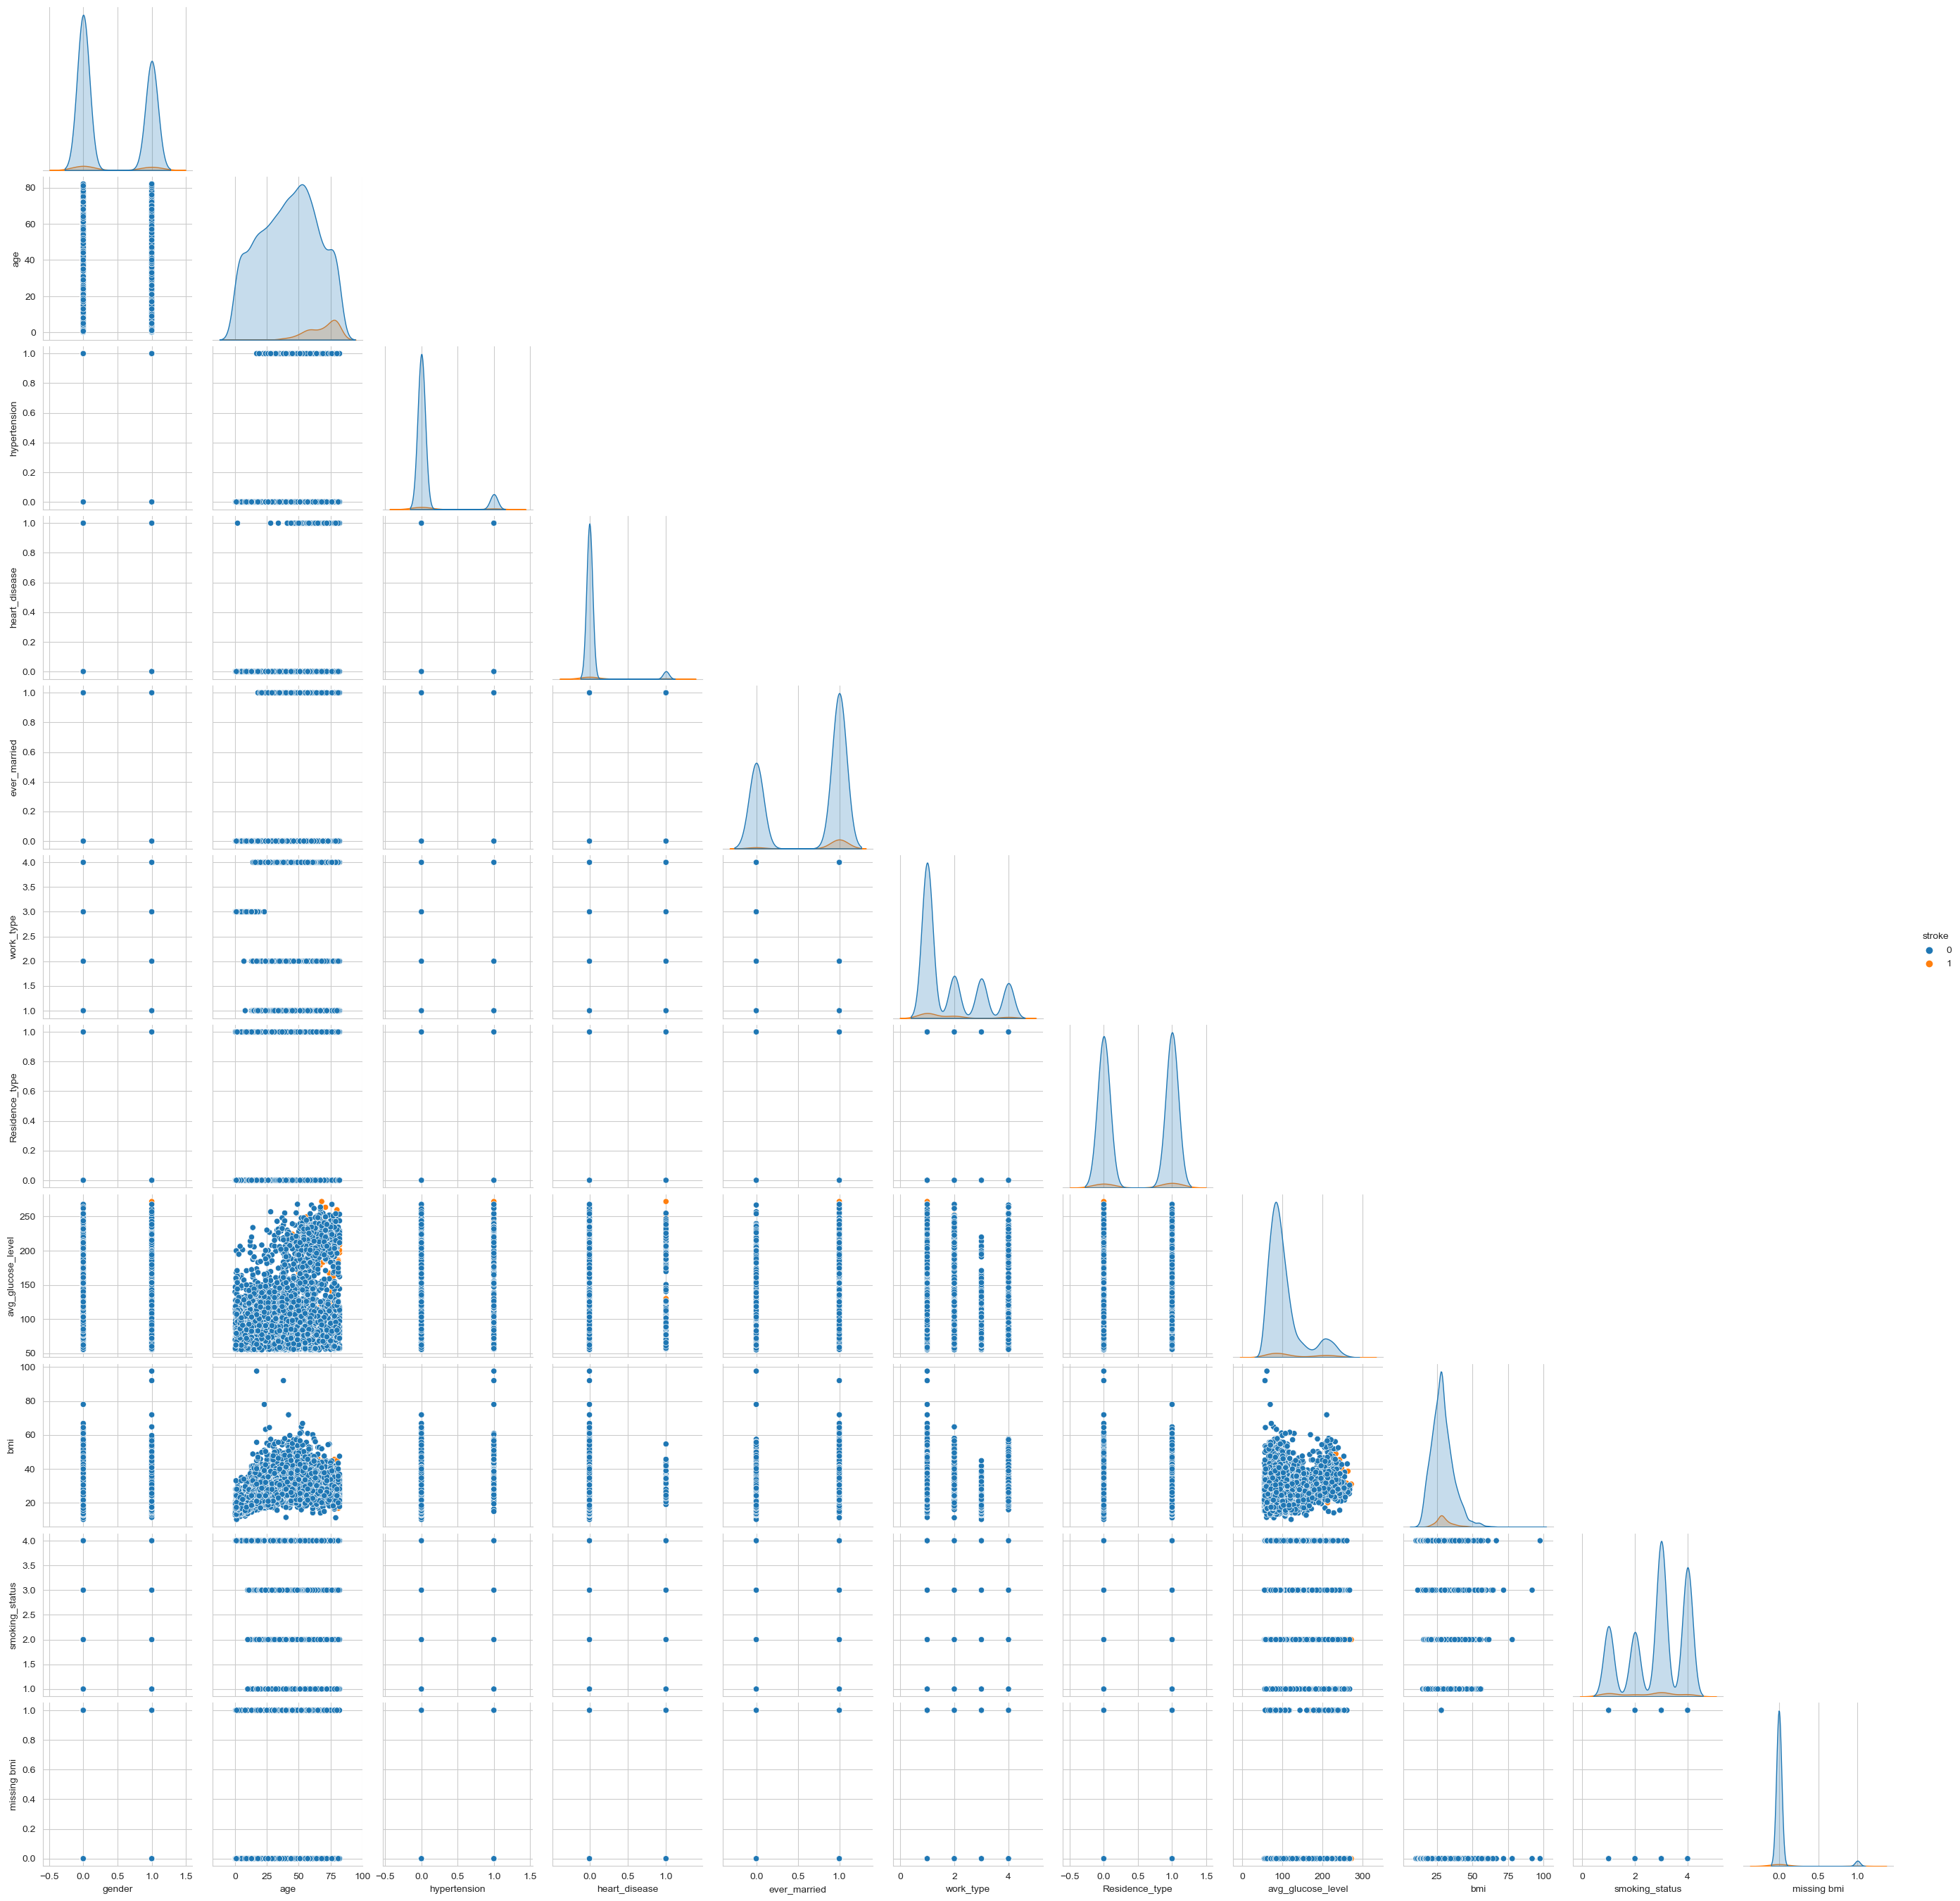

In [72]:
plt.figure()
sns.pairplot(df_copy1,hue="stroke", corner=True)
plt.show()

In [73]:
X = df_copy1.drop(columns=['stroke'])
y = df_copy1['stroke'].copy()

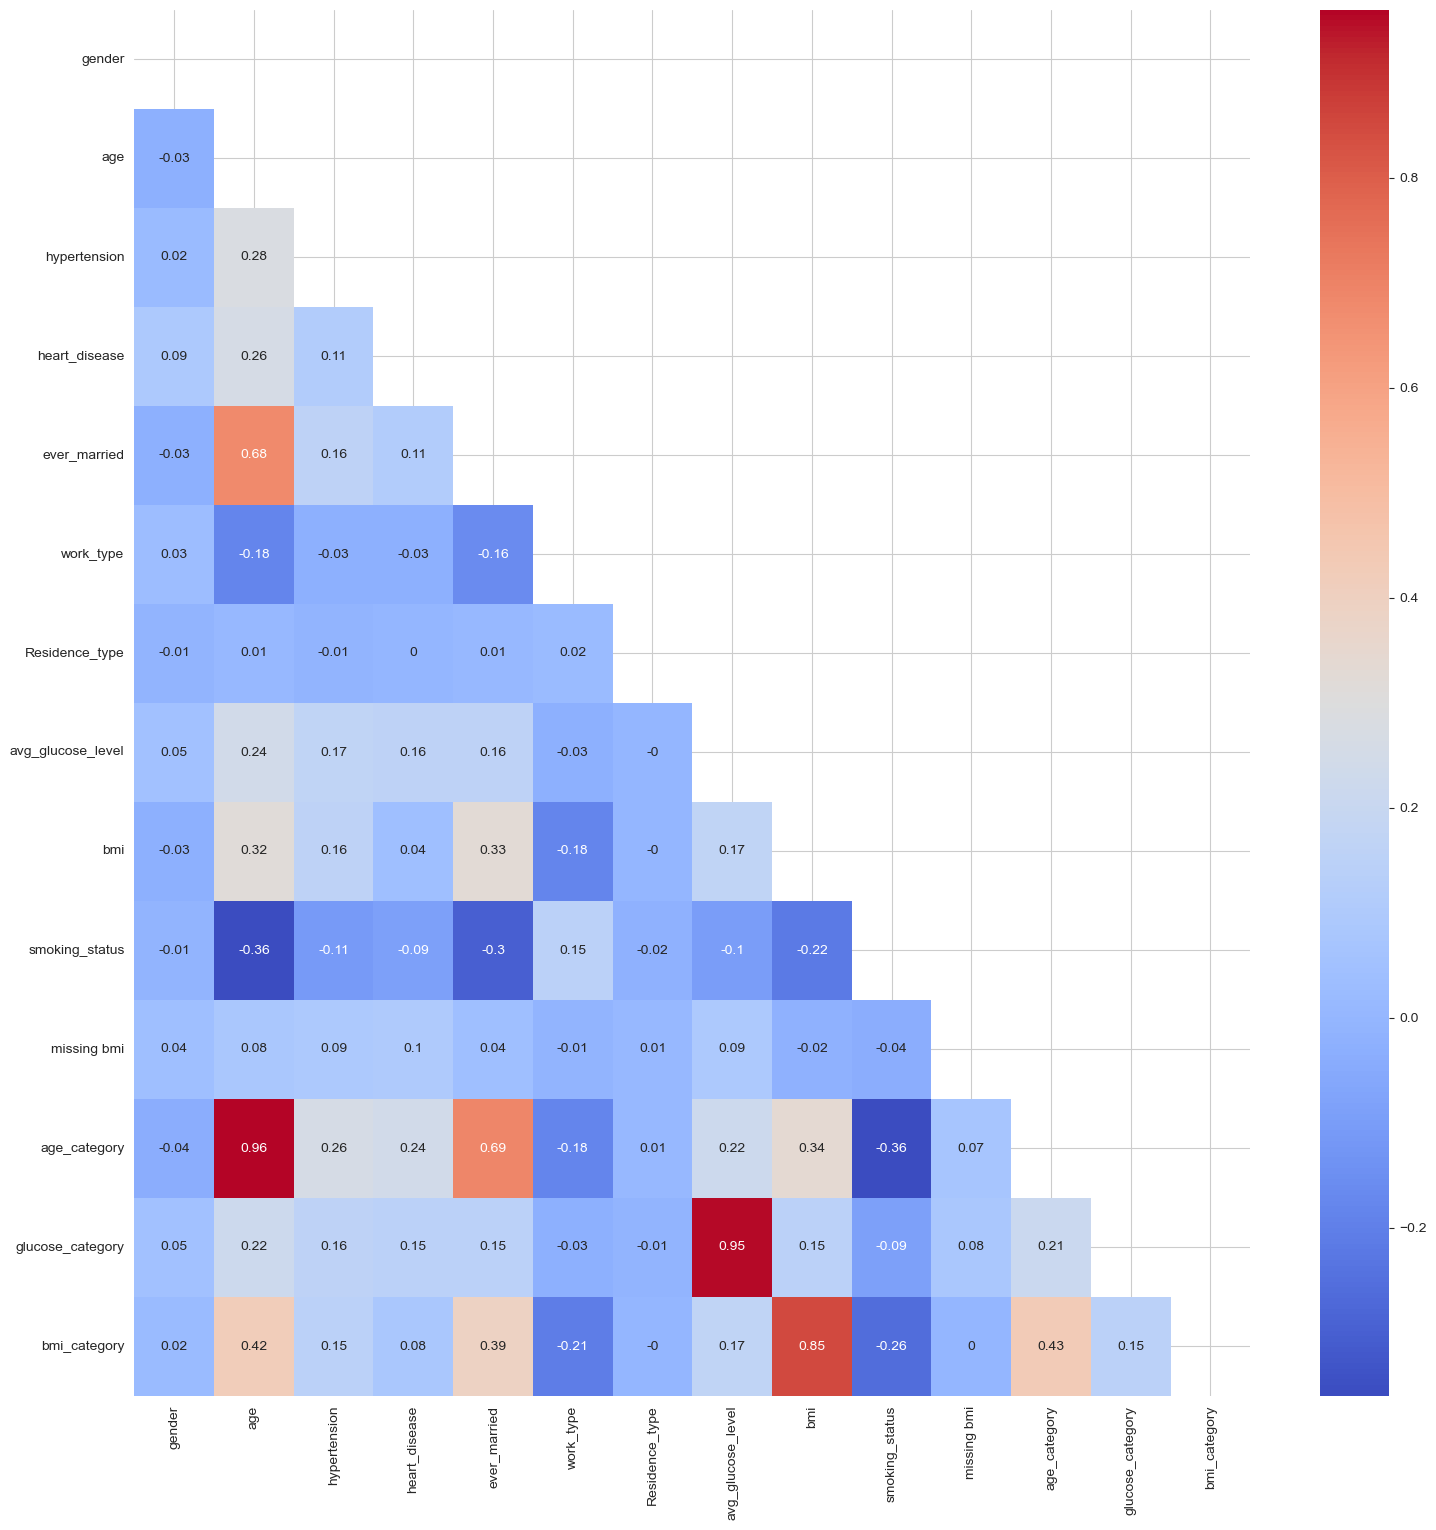

In [74]:
corr_df = X.corr()

mask = np.triu(corr_df)

plt.figure(figsize=(18, 18))
sns.heatmap(corr_df.round(2), mask=mask, cmap='coolwarm', annot=True)
plt.show()

In [75]:
# Splitting our data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=12345,
                                                    stratify=y)

# Check
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4088, 14) (1022, 14) (4088,) (1022,)


In [76]:
# Apply SMOTE to the training set
smote = SMOTE()
X_train_sam, y_train_sam = smote.fit_resample(X_train, y_train)
X_ss, y_ss= smote.fit_resample(X,y)

In [77]:
# Check
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4088, 14) (1022, 14) (4088,) (1022,)


In [78]:
print(X_train_sam.shape, X_test.shape, y_train_sam.shape, y_test.shape)

(7778, 14) (1022, 14) (7778,) (1022,)


In [79]:
X_train_sam.drop(columns=['age_category','glucose_category','bmi_category'],inplace=True)
X_test.drop(columns=['age_category','glucose_category','bmi_category'],inplace=True)

In [80]:
X_train_sam.isna().sum()   

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
missing bmi          0
dtype: int64

In [81]:
# Binning continuous features for better categorization
X_train_sam['age_category'] = pd.cut(X_train_sam['age'], bins=[0, 18, 35, 60, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
X_train_sam['glucose_category'] = pd.cut(X_train_sam['avg_glucose_level'], bins=[0, 90, 140, 200, 500], labels=['Low', 'Normal', 'High', 'Very High'])
X_train_sam['bmi_category'] = pd.cut(X_train_sam['bmi'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Display the first few rows of the modified DataFrame
X_train_sam.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,missing bmi,age_category,glucose_category,bmi_category
0,1,80.0,0,0,0,2,0,204.17,41.3,1,False,Senior,Very High,Obese
1,0,80.0,1,0,0,1,1,66.03,35.4,3,False,Senior,Low,Obese
2,1,70.0,1,0,1,2,1,251.60,27.1,3,False,Senior,Very High,Overweight
3,0,24.0,0,0,0,1,1,65.44,23.6,3,False,Young Adult,Low,Normal
4,0,72.0,0,0,1,4,0,118.22,21.9,1,False,Senior,Normal,Normal


In [82]:
# Binning continuous features for better categorization
X_test['age_category'] = pd.cut(X_test['age'], bins=[0, 18, 35, 60, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
X_test['glucose_category'] = pd.cut(X_test['avg_glucose_level'], bins=[0, 90, 140, 200, 500], labels=['Low', 'Normal', 'High', 'Very High'])
X_test['bmi_category'] = pd.cut(X_test['bmi'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Display the first few rows of the modified DataFrame
X_test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,missing bmi,age_category,glucose_category,bmi_category
4394,0,22.0,0,0,1,1,0,73.94,24.8,4,False,Young Adult,Low,Normal
1781,0,39.0,0,0,1,1,1,92.82,37.4,3,False,Adult,Normal,Obese
3290,0,56.0,0,0,1,1,0,163.02,29.6,3,False,Adult,High,Overweight
934,0,52.0,0,0,1,2,1,113.21,38.3,3,False,Adult,Normal,Obese
1141,1,57.0,0,0,1,1,0,90.06,29.8,4,False,Adult,Normal,Overweight


In [83]:
X_train_sam['age_category'] = X_train_sam['age_category'].map({
'Senior' : 4, 
'Adult' : 3,
'Young Adult' : 2,
'Child' : 1
})

In [84]:
X_train_sam['glucose_category'] = X_train_sam['glucose_category'].map({
'Low' : 1,
'Normal' : 2,
'High' : 3,
'Very High' : 4
})

In [85]:
X_train_sam['bmi_category'] = X_train_sam['bmi_category'].map({
    'Underweight' : 1,
    'Normal' : 2,
    'Overweight' : 3,
    'Obese' : 4
            })

In [86]:
X_test['age_category'] = X_test['age_category'].map({
'Senior' : 4, 
'Adult' : 3,
'Young Adult' : 2,
'Child' : 1
})

In [87]:
X_test['glucose_category'] = X_test['glucose_category'].map({
'Low' : 1,
'Normal' : 2,
'High' : 3,
'Very High' : 4
})

In [88]:
X_test['bmi_category'] = X_test['bmi_category'].map({
    'Underweight' : 1,
    'Normal' : 2,
    'Overweight' : 3,
    'Obese' : 4
            })

In [89]:
X_train_sam.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,missing bmi,age_category,glucose_category,bmi_category
0,1,80.0,0,0,0,2,0,204.17,41.3,1,False,4,4,4
1,0,80.0,1,0,0,1,1,66.03,35.4,3,False,4,1,4
2,1,70.0,1,0,1,2,1,251.60,27.1,3,False,4,4,3
3,0,24.0,0,0,0,1,1,65.44,23.6,3,False,2,1,2
4,0,72.0,0,0,1,4,0,118.22,21.9,1,False,4,2,2


In [90]:
X_train_sam.drop(columns=['age','avg_glucose_level','bmi'],inplace=True)
X_test.drop(columns=['age','avg_glucose_level','bmi'],inplace=True)

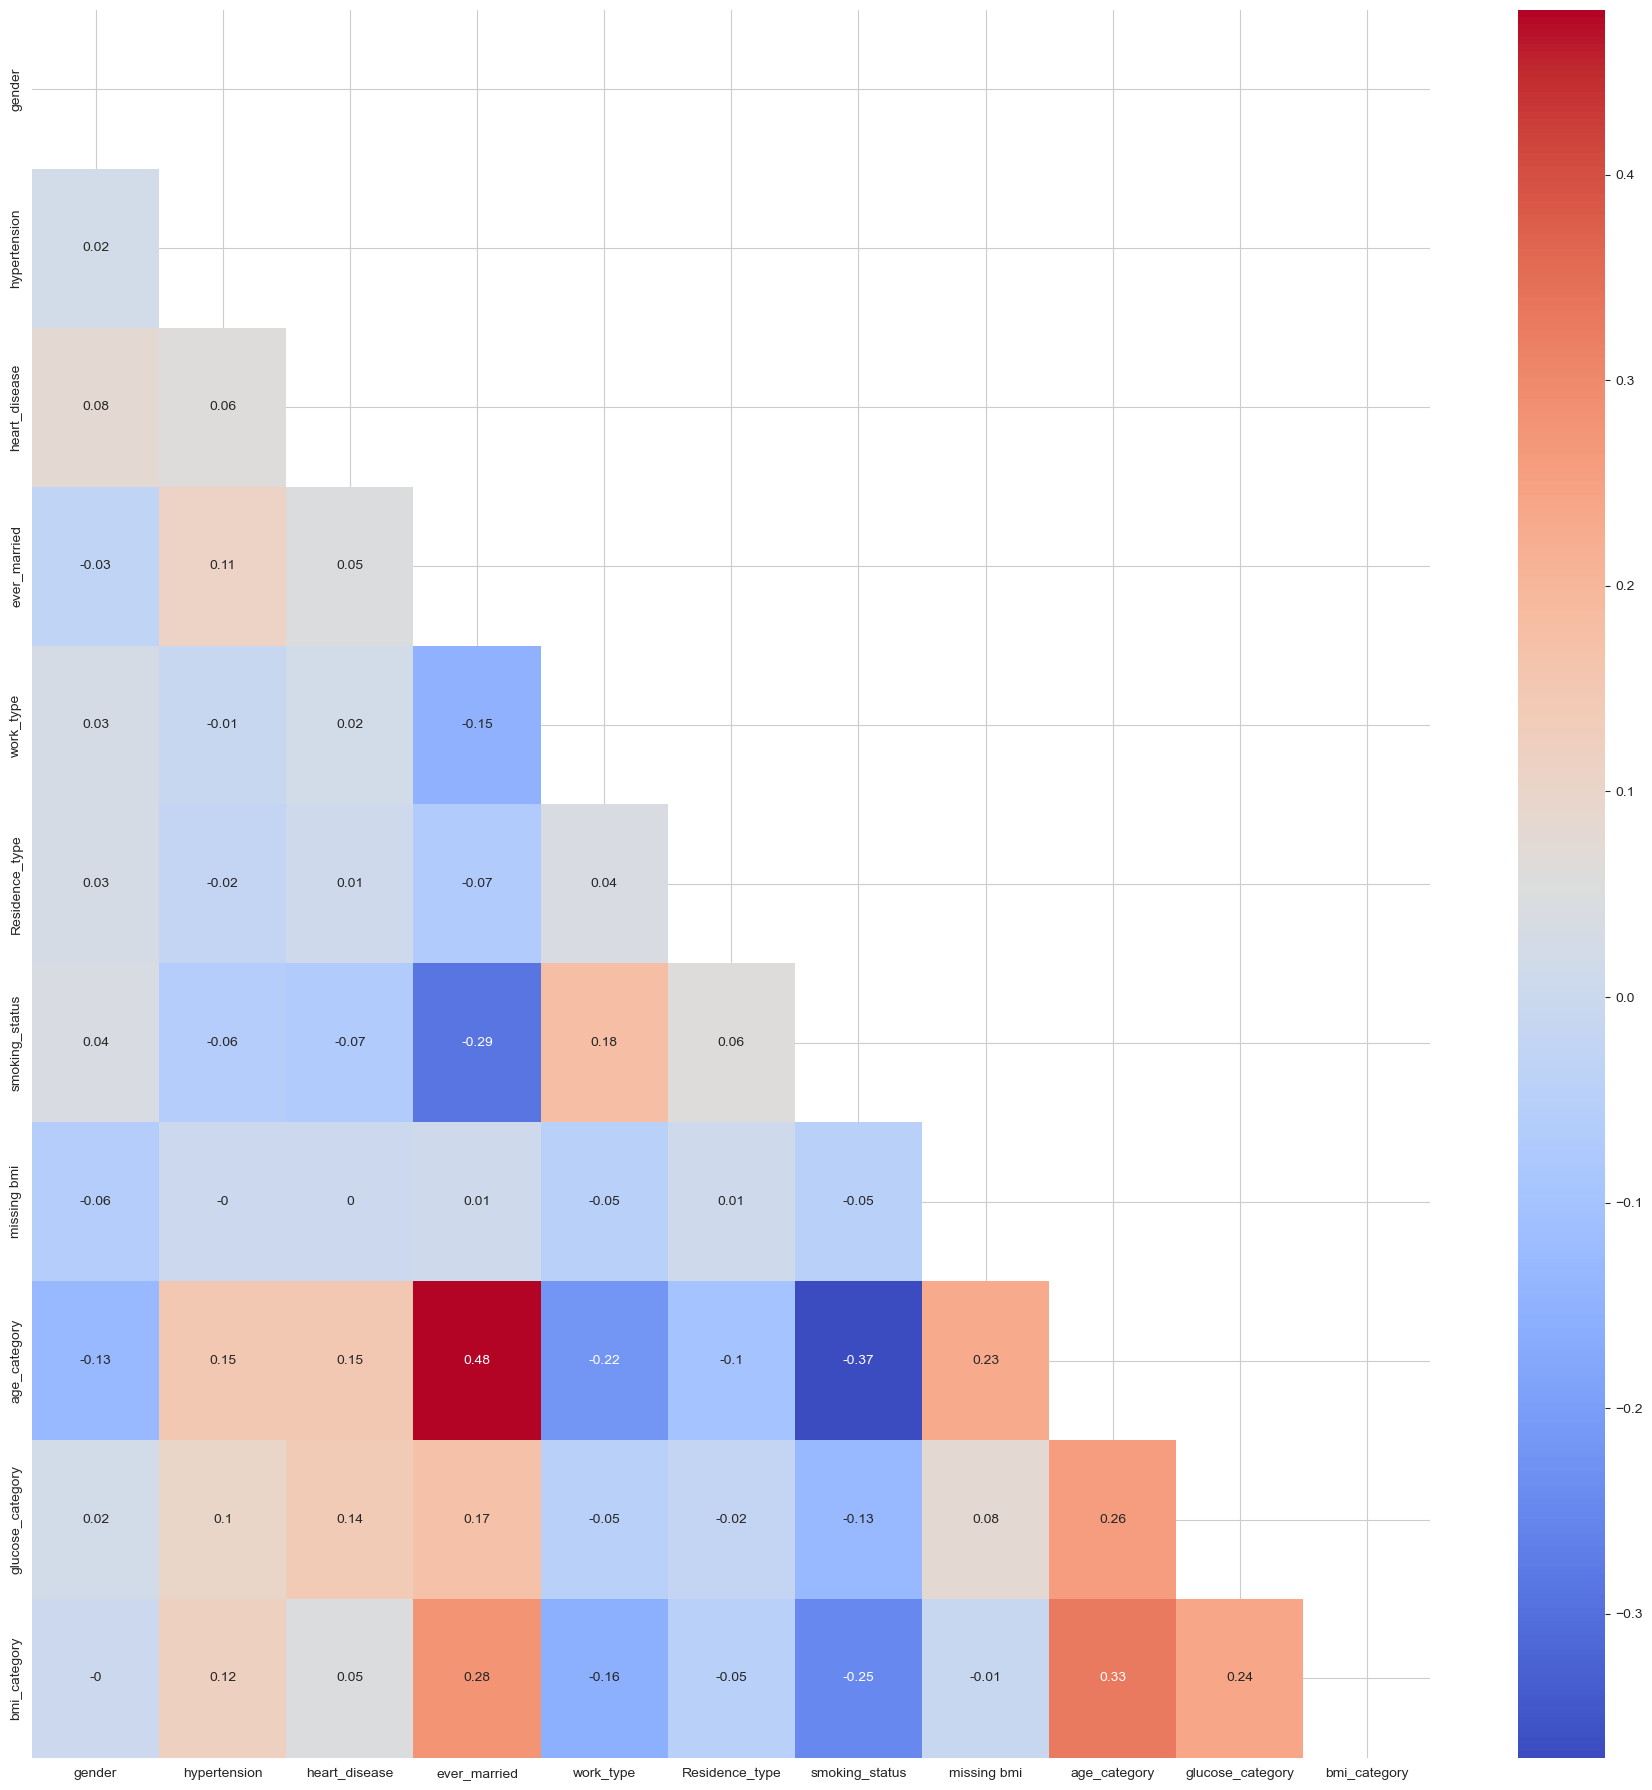

In [91]:
corr_df = X_train_sam.corr()

mask = np.triu(corr_df)

plt.figure(figsize=(18, 18))
sns.heatmap(corr_df.round(2), mask=mask, cmap='coolwarm', annot=True)
plt.tight_layout()
plt.show()

In [92]:
# Instantiate the scaler
SS = StandardScaler()

# Fit the scaler and transform both data subsets
X_train_ss = SS.fit_transform(X_train_sam)
X_test_ss = SS.transform(X_test)

In [93]:
print(X_train_ss.shape, X_test_ss.shape, y_train_sam.shape, y_test.shape)

(7778, 11) (1022, 11) (7778,) (1022,)


In [94]:
# Check
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4088, 14) (1022, 11) (4088,) (1022,)


In [95]:
import time

In [96]:
start = time.time()

# Empty lists to append the training and test accuracy scores to
train_acc_ss = []
test_acc_ss = []

# The C_values to try
C_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
# Loop through the same C values
for C in C_values:

    # Instantiate the model
    logit=LogisticRegression(C=C, max_iter=1000, random_state=42)

    # Fit the model
    logit.fit(X_train_ss, y_train_sam)

    # Score the model
    train_acc_ss.append(logit.score(X_train_ss, y_train_sam))
    test_acc_ss.append(logit.score(X_test_ss, y_test))

stop = time.time()
runtime_logit_ss = stop-start
print(f"Runtime: {round(runtime_logit_ss,2)} seconds")

Runtime: 0.1 seconds


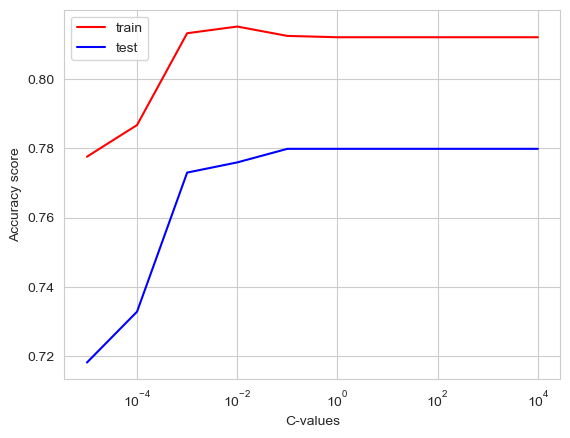

In [97]:

# Plotting the train and test scores for every C value
plt.figure()
plt.plot(C_values, train_acc_ss, c='red', label='train')
plt.plot(C_values, test_acc_ss, c='blue', label='test')
plt.xscale('log')
plt.xlabel('C-values')
plt.ylabel('Accuracy score')
plt.legend()
plt.show()

In this instance, our best Logistic Regression model was at C equal to 0.001 We can see clearly the tell-tale elbow which indicates the bulk of learning has been completed and a point beyond which overfitting might be a concern. Let's take a look at the model's performance:

In [98]:
# The Logistic Regression that performed the best on the standardized data
# Instantiate the model
logit_ss = LogisticRegression(C=0.001, random_state=42)

# Fit the model
logit_ss.fit(X_train_ss, y_train_sam)

# Store accuracy scores
logit_ss_train = logit_ss.score(X_train_ss, y_train_sam)
logit_ss_test = logit_ss.score(X_test_ss, y_test)

# Score the model
print(f"Train Accuracy: {logit_ss_train}")
print(f"Test Accuracy: {logit_ss_test}")

Train Accuracy: 0.8131910516842376
Test Accuracy: 0.7729941291585127


In [99]:
from sklearn.metrics import classification_report
y_test_pred = logit_ss.predict(X_test_ss) # USING THE UNSAMPLED BUT SCALED TEST DATA

report_initial = classification_report(y_test, y_test_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.97      0.79      0.87       972
           1       0.11      0.52      0.18        50

    accuracy                           0.77      1022
   macro avg       0.54      0.65      0.53      1022
weighted avg       0.93      0.77      0.83      1022



##### Roc curve

In [100]:
from sklearn.metrics import roc_curve

In [101]:
from sklearn.metrics import roc_curve, roc_auc_score



In [102]:
def false_positive_rate(y_true, y_pred):
    
    false_positives = (y_true == 0) & (y_pred == 1) # find all values where y is negative
                                                    # but we predicted positive
    false_positive_number = false_positives.sum()

    true_negatives = (y_true == 0) & (y_pred == 0)  # find all values where y is negative
                                                    # and we predicted negative
    true_negative_number = true_negatives.sum()

    # Finally, find the ratio of (FP) to (TN + FP)
    FPR = false_positive_number/(true_negative_number + false_positive_number)
    
    return FPR

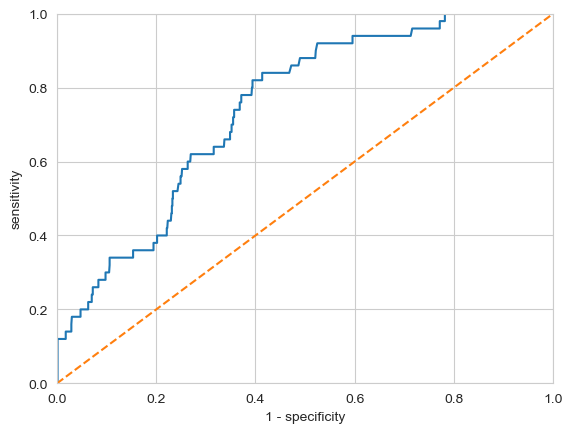

In [103]:
model = LogisticRegression()
model.fit(X_train_ss, y_train_sam)
y_pred_proba = model.predict_proba(X_test_ss)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.show()

In [104]:
# Regenerate scores
y_proba = logit_ss.predict_proba(X_test_ss)[:,1]
fprs, tprs, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

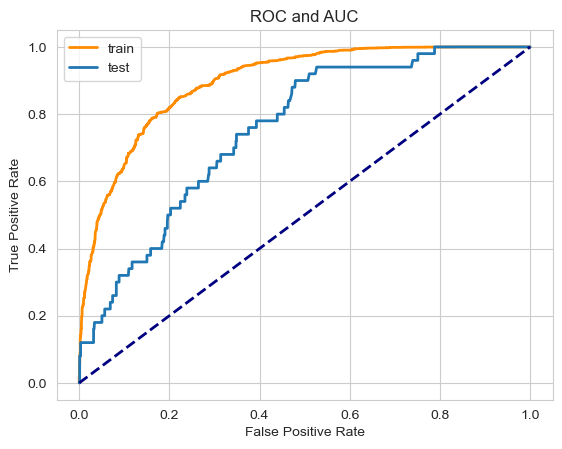

Test AUC score: 0.7529423868312757
Train AUC score: 0.8960761940982342


In [105]:
#Get the probability for each point in the train set.
y_proba_train = logit_ss.predict_proba(X_train_ss)[:,1]

# Compute ROC curve and AUC for for the one class
fprs_train, tprs_train, thresholds_train = roc_curve(y_train_sam, y_proba_train)
roc_auc_train = roc_auc_score(y_train_sam, y_proba_train)

# Plot the ROC curve.
plt.figure()
plt.plot(fprs_train, tprs_train, color='darkorange', lw=2, label='train')
plt.plot(fprs, tprs, lw=2, label='test')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC')
plt.legend(loc="best")
plt.show()
print(f"Test AUC score: {roc_auc}")
print(f"Train AUC score: {roc_auc_train}")

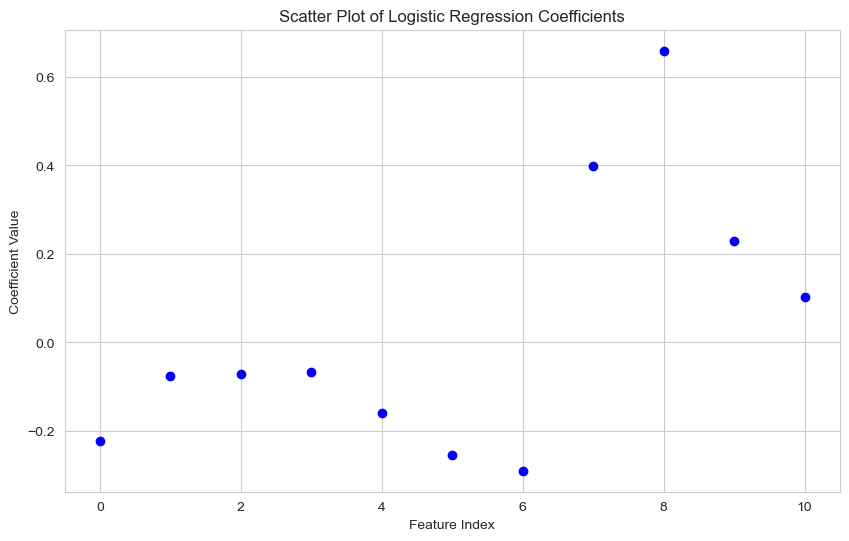

In [106]:
# Assuming logistic_regression_model is your trained logistic regression model
coefficients = logit_ss.coef_[0]  # Extracting the coefficients

# Creating an index for each coefficient
feature_index = np.arange(len(coefficients))

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(feature_index, coefficients, color='blue')
plt.title('Scatter Plot of Logistic Regression Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

### as above we can see the most effective feature is age

In [107]:
coefficients

array([-0.22304156, -0.07635859, -0.07096684, -0.06749587, -0.15830628,
       -0.25520267, -0.2897131 ,  0.39942622,  0.65907807,  0.22979583,
        0.10341397])

In [108]:
logit_ss.coef_

array([[-0.22304156, -0.07635859, -0.07096684, -0.06749587, -0.15830628,
        -0.25520267, -0.2897131 ,  0.39942622,  0.65907807,  0.22979583,
         0.10341397]])

In [109]:
# class distribution
display(y_test.value_counts())

# predict classification
y_test_pred = logit_ss.predict(X_test_ss) # USING THE UNSAMPLED BUT SCALED TEST DATA

# confusion matrix
conmat = pd.DataFrame(
    data = confusion_matrix(y_test_pred, y_test),
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1']
)
display(conmat)

print(f'Recall score: {recall_score(y_test, y_test_pred)*100:0.1f}%')
print(f'Precision score: {precision_score(y_test, y_test_pred)*100:0.1f}%')
print(f'F1 score: {f1_score(y_test, y_test_pred)*100:0.1f}%')

stroke
0    972
1     50
Name: count, dtype: int64

,predicted 0,predicted 1
true 0,764,24
true 1,208,26


Recall score: 52.0%
Precision score: 11.1%
F1 score: 18.3%


In [110]:
df_copy.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,missing bmi,age_category,glucose_category,bmi_category
0,1.188073,1.039513,-0.328602,4.185032,0.723884,-0.153836,0.984080,1.780170,1.062020,-0.351781,4.418381,-0.202349,0.636614,2.036140,-0.230858
1,-0.840344,0.779567,-0.328602,-0.238947,0.723884,0.763438,-1.016178,1.543029,-0.092500,0.581552,4.418381,4.941952,0.636614,2.036140,0.892652
2,1.188073,1.602729,-0.328602,4.185032,0.723884,-0.153836,-1.016178,0.542872,0.505134,0.581552,4.418381,-0.202349,0.636614,0.711547,-0.230858
3,-0.840344,0.259675,-0.328602,-0.238947,0.723884,-0.153836,0.984080,1.359290,0.763203,1.514885,4.418381,-0.202349,-1.099760,-1.937638,-0.230858
4,-0.840344,1.559405,3.043196,-0.238947,0.723884,0.763438,-1.016178,1.367436,-0.649386,0.581552,4.418381,-0.202349,0.636614,-1.937638,-1.354368


In [111]:
df_copy1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,missing bmi,age_category,glucose_category,bmi_category
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1,False,4,4,4
1,0,61.0,0,0,1,2,0,202.21,28.1,3,1,True,4,4,3
2,1,80.0,0,1,1,1,0,105.92,32.5,3,1,False,4,2,4
3,0,49.0,0,0,1,1,1,171.23,34.4,2,1,False,3,3,4
4,0,79.0,1,0,1,2,0,174.12,24.0,3,1,False,4,3,2


### KNN

In [112]:
start = time.time()

# The different K values to try out and save to 'neighbors'
neighbors = range(1, 55, 2)

# Empty lists to append the accuracies to
train_acc_mm = []
test_acc_mm = []

# Loop through neighbors
for K in neighbors:

    # Instantiate the model
    knn = KNeighborsClassifier(n_neighbors=K)

    # Fit the model
    knn.fit(X_train_ss, y_train_sam)

    # Score the model
    train_acc_mm.append(knn.score(X_train_ss, y_train_sam))
    test_acc_mm.append(knn.score(X_test_ss, y_test))

stop = time.time()
runtime_knn_mm = stop-start
print(f"Runtime: {round(runtime_knn_mm,2)} seconds")

Runtime: 36.97 seconds


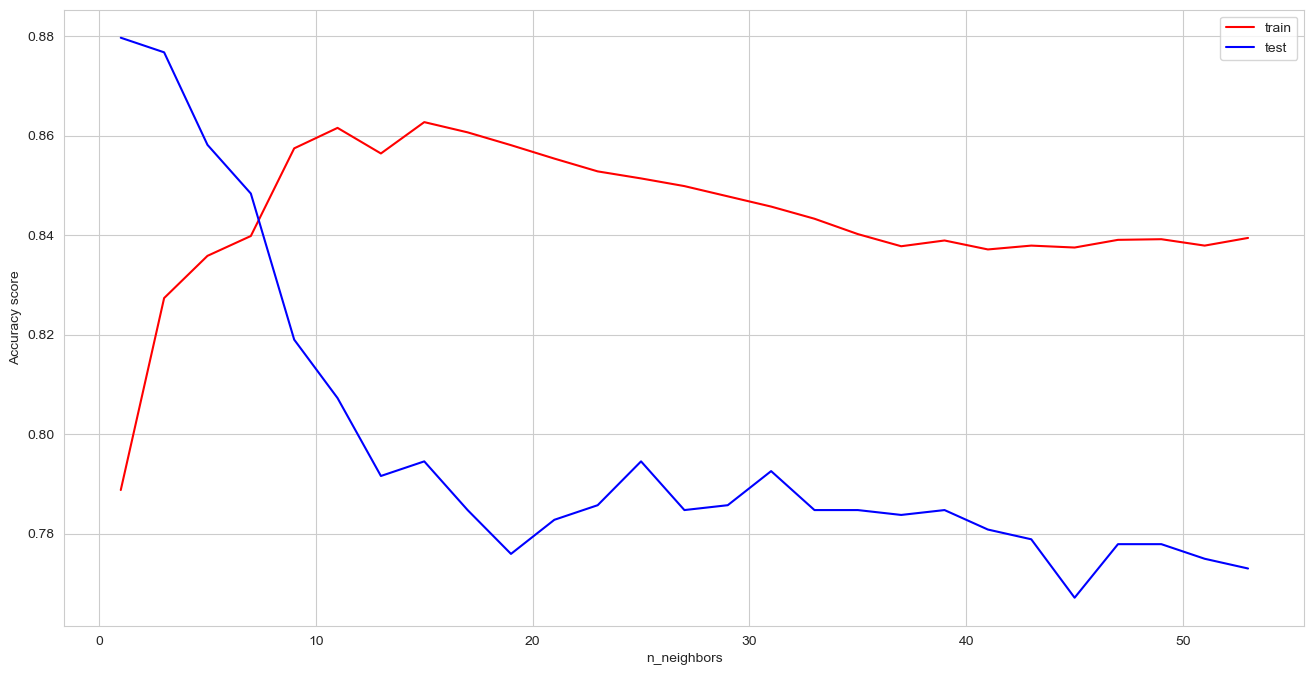

In [113]:
# Plot the accuracies
plt.figure(figsize=(16,8))
plt.plot(neighbors, train_acc_mm, c='red', label='train')
plt.plot(neighbors, test_acc_mm, c='blue', label='test')
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy score")
plt.legend()
plt.show()

These plots are quite choppy so conclusions will be somewhat subjective. However, the gap between the two plots is at its narrowest at around n_neighbors = 5 and 15.

In [114]:
# KNN with n_neighbors=5
# Instantiate the model
knn_mm = KNeighborsClassifier(n_neighbors=7)

# Fit the model
knn_mm.fit(X_train_ss, y_train_sam)

# Store accuracy scores
knn_mm_train = knn_mm.score(X_train_ss, y_train_sam)
knn_mm_test = knn_mm.score(X_test_ss, y_test)

# Score the model
print(f"Train Accuracy: {knn_mm_train}")
print(f"Test Accuracy: {knn_mm_test}")

Train Accuracy: 0.8398045770120853
Test Accuracy: 0.8483365949119374


In [115]:
# class distribution
display(y_test.value_counts())

# predict classification
y_test_pred = knn_mm.predict(X_test_ss) # USING THE UNSAMPLED BUT SCALED TEST DATA

# confusion matrix
conmat = pd.DataFrame(
    data = confusion_matrix(y_test, y_test_pred),
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1']
)
display(conmat)

print(f'Recall score: {recall_score(y_test, y_test_pred)*100:0.1f}%')
print(f'Precision score: {precision_score(y_test, y_test_pred)*100:0.1f}%')
print(f'F1 score: {f1_score(y_test, y_test_pred)*100:0.1f}%')

stroke
0    972
1     50
Name: count, dtype: int64

,predicted 0,predicted 1
true 0,850,122
true 1,33,17


Recall score: 34.0%
Precision score: 12.2%
F1 score: 18.0%


In [116]:
# KNN with n_neighbors=15
# Instantiate the model
knn_mm = KNeighborsClassifier(n_neighbors=15)

# Fit the model
knn_mm.fit(X_train_ss, y_train_sam)

# Store accuracy scores
knn_mm_train = knn_mm.score(X_train_ss, y_train_sam)
knn_mm_test = knn_mm.score(X_test_ss, y_test)

# Score the model
print(f"Train Accuracy: {knn_mm_train}")
print(f"Test Accuracy: {knn_mm_test}")

Train Accuracy: 0.8626896374389303
Test Accuracy: 0.7945205479452054


In [117]:
# class distribution
display(y_test.value_counts())

# predict classification
y_test_pred = knn_mm.predict(X_test_ss) # USING THE UNSAMPLED BUT SCALED TEST DATA

# confusion matrix
conmat = pd.DataFrame(
    data = confusion_matrix(y_test, y_test_pred),
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1']
)
display(conmat)

print(f'Recall score: {recall_score(y_test, y_test_pred)*100:0.1f}%')
print(f'Precision score: {precision_score(y_test, y_test_pred)*100:0.1f}%')
print(f'F1 score: {f1_score(y_test, y_test_pred)*100:0.1f}%')

stroke
0    972
1     50
Name: count, dtype: int64

,predicted 0,predicted 1
true 0,790,182
true 1,28,22


Recall score: 44.0%
Precision score: 10.8%
F1 score: 17.3%


In [118]:
report_initial = classification_report(y_test, y_test_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       972
           1       0.11      0.44      0.17        50

    accuracy                           0.79      1022
   macro avg       0.54      0.63      0.53      1022
weighted avg       0.92      0.79      0.85      1022



### Decision Tree

In [119]:
# number of rows
X_train.shape[0]

4088

In [120]:
# indicating range of max_depth values
range(1, int(np.sqrt(X_train.shape[0])))

range(1, 63)

In [121]:
start = time.time()

# A list of the maximum depths to try out and save to 'depths'
depths = range(1, int(np.sqrt(X_train.shape[0])))

# Empty lists to append to
train_acc_ss = []
test_acc_ss = []

# Loop through the depths
for max_depth in depths:

    # Instantiate the model
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

    # Fit the model
    dt.fit(X_train_ss, y_train_sam)

    # Score the model
    train_acc_ss.append(dt.score(X_train_ss, y_train_sam))
    test_acc_ss.append(dt.score(X_test_ss, y_test))

stop = time.time()
runtime_dt_mm = stop-start
print(f"Runtime: {round(runtime_dt_mm,2)} seconds")

Runtime: 0.73 seconds


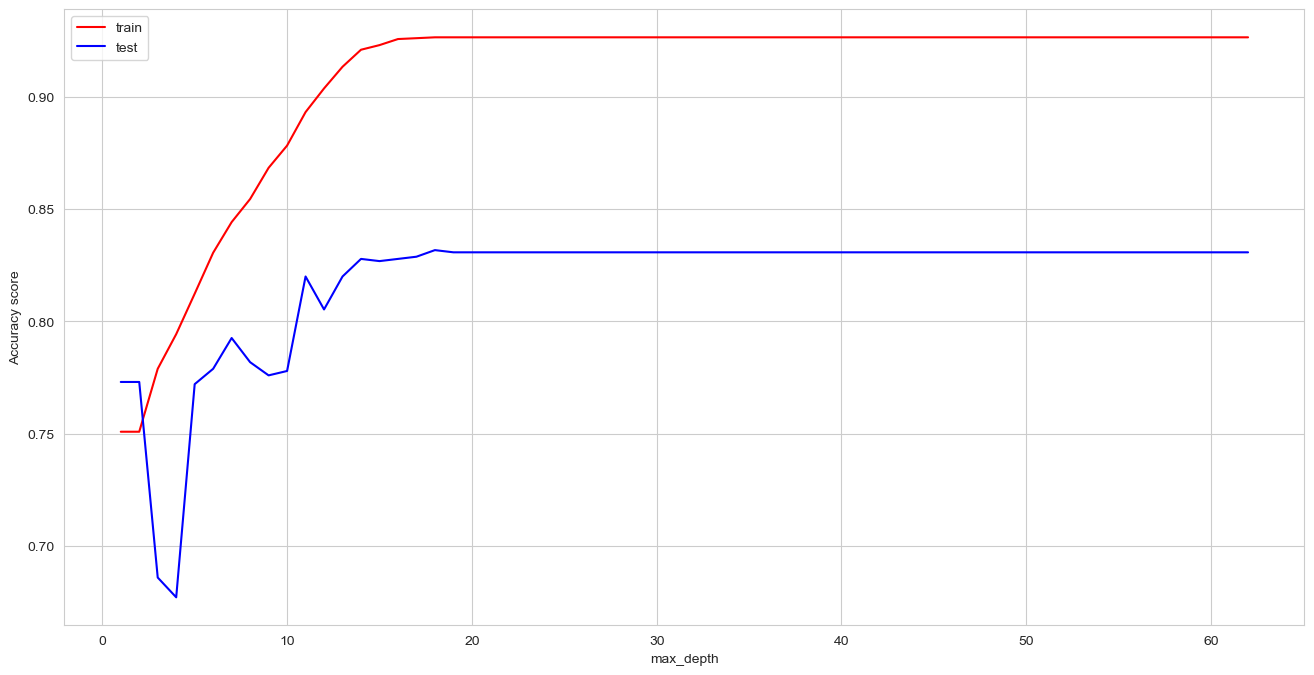

In [122]:
# Plot the accuracies
plt.figure(figsize=(16,8))
plt.plot(depths, train_acc_ss, c='red', label='train')
plt.plot(depths, test_acc_ss, c='blue', label='test')
plt.xlabel("max_depth")
plt.ylabel("Accuracy score")
plt.legend()
plt.show()

max_depth=2 and 6 appears to be optimal.

In [123]:
# Best Decision Tree Classifier on standardized data
# Instantiate the model
dt_ss = DecisionTreeClassifier(max_depth=2, random_state=42)

# Fit the model
dt_ss.fit(X_train_ss, y_train_sam)

# Store accuracy scores
dt_ss_train = dt_ss.score(X_train_ss, y_train_sam)
dt_ss_test = dt_ss.score(X_test_ss, y_test)

# Score the model
print(f"Train Accuracy: {dt_ss_train}")
print(f"Test Accuracy: {dt_ss_test}")

Train Accuracy: 0.7508356904088455
Test Accuracy: 0.7729941291585127


In [124]:
# class distribution
display(y_test.value_counts())

# predict classification
y_test_pred = dt_ss.predict(X_test_ss) # USING THE UNSAMPLED BUT SCALED TEST DATA

# confusion matrix
conmat = pd.DataFrame(
    data = confusion_matrix(y_test, y_test_pred),
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1']
)
display(conmat)

print(f'Recall score: {recall_score(y_test, y_test_pred)*100:0.1f}%')
print(f'Precision score: {precision_score(y_test, y_test_pred)*100:0.1f}%')
print(f'F1 score: {f1_score(y_test, y_test_pred)*100:0.1f}%')

stroke
0    972
1     50
Name: count, dtype: int64

,predicted 0,predicted 1
true 0,757,215
true 1,17,33


Recall score: 66.0%
Precision score: 13.3%
F1 score: 22.1%


In [125]:
report_initial = classification_report(y_test, y_test_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.98      0.78      0.87       972
           1       0.13      0.66      0.22        50

    accuracy                           0.77      1022
   macro avg       0.56      0.72      0.54      1022
weighted avg       0.94      0.77      0.84      1022



In [126]:
# Best Decision Tree Classifier on standardized data
# Instantiate the model
dt_ss = DecisionTreeClassifier(max_depth=6, random_state=42)

# Fit the model
dt_ss.fit(X_train_ss, y_train_sam)

# Store accuracy scores
dt_ss_train = dt_ss.score(X_train_ss, y_train_sam)
dt_ss_test = dt_ss.score(X_test_ss, y_test)

# Score the model
print(f"Train Accuracy: {dt_ss_train}")
print(f"Test Accuracy: {dt_ss_test}")

Train Accuracy: 0.8305476986371818
Test Accuracy: 0.7788649706457925


In [127]:
# class distribution
display(y_test.value_counts())

# predict classification
y_test_pred = dt_ss.predict(X_test_ss) # USING THE UNSAMPLED BUT SCALED TEST DATA

# confusion matrix
conmat = pd.DataFrame(
    data = confusion_matrix(y_test, y_test_pred),
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1']
)
display(conmat)

print(f'Recall score: {recall_score(y_test, y_test_pred)*100:0.1f}%')
print(f'Precision score: {precision_score(y_test, y_test_pred)*100:0.1f}%')
print(f'F1 score: {f1_score(y_test, y_test_pred)*100:0.1f}%')

stroke
0    972
1     50
Name: count, dtype: int64

,predicted 0,predicted 1
true 0,770,202
true 1,24,26


Recall score: 52.0%
Precision score: 11.4%
F1 score: 18.7%


In [128]:
report_initial = classification_report(y_test, y_test_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.97      0.79      0.87       972
           1       0.11      0.52      0.19        50

    accuracy                           0.78      1022
   macro avg       0.54      0.66      0.53      1022
weighted avg       0.93      0.78      0.84      1022



In [129]:
# to do checkk for optimize one factor

### Support Vector Machines

In [130]:
from sklearn.svm import LinearSVC

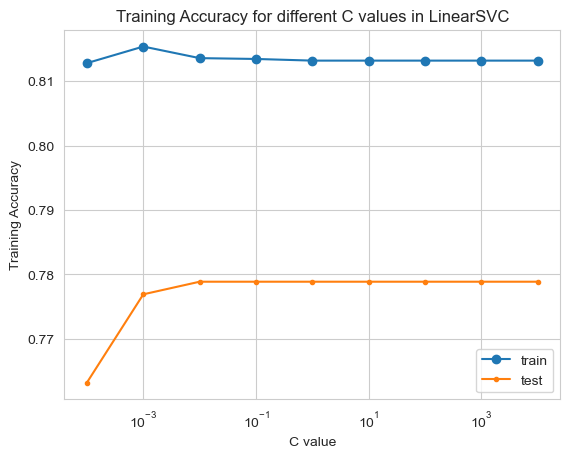

[0.8128053484186166,
 0.8153767035227565,
 0.8135767549498586,
 0.8134481871946516,
 0.8131910516842376,
 0.8131910516842376,
 0.8131910516842376,
 0.8131910516842376,
 0.8131910516842376]

In [132]:
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,10000]
training_scores = []
test_scores = []

for c in C_values:
    SVM_model = LinearSVC(C=c, max_iter=1000,dual=False)
    SVM_model.fit(X_train_ss, y_train_sam)
    training_scores.append(SVM_model.score(X_train_ss, y_train_sam))
    test_scores.append(SVM_model.score(X_test_ss, y_test))

# Plotting the training scores
plt.plot(C_values, training_scores, marker='o',label='train')
plt.plot(C_values, test_scores, marker='.',label="test")
plt.xscale('log')  # Since C_values vary on a logarithmic scale
plt.xlabel('C value')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy for different C values in LinearSVC')
plt.legend()
plt.show()
training_scores

In [133]:
SVM_model = LinearSVC(C=1000,max_iter=100000,dual=False)
SVM_model.fit(X_train_ss, y_train_sam)


print(f"accuracy of train data {SVM_model.score(X_train_ss, y_train_sam)}")
print(f"accuracy of test data {SVM_model.score(X_test_ss, y_test)}")

accuracy of train data 0.8131910516842376
accuracy of test data 0.7788649706457925


In [134]:
# Instantiate the model
SVM_model = LinearSVC(C=1000,max_iter=100000,dual=False)

# Fit the model
SVM_model.fit(X_train_ss, y_train_sam)

# Store accuracy scores
dt_ss_train = SVM_model.score(X_train_ss, y_train_sam)
dt_ss_test = SVM_model.score(X_test_ss, y_test)

# Score the model
print(f"Train Accuracy: {dt_ss_train}")
print(f"Test Accuracy: {dt_ss_test}")

Train Accuracy: 0.8131910516842376
Test Accuracy: 0.7788649706457925


In [135]:
# class distribution
display(y_test.value_counts())

# predict classification
y_test_pred = SVM_model.predict(X_test_ss) # USING THE UNSAMPLED BUT SCALED TEST DATA

# confusion matrix
conmat = pd.DataFrame(
    data = confusion_matrix(y_test, y_test_pred),
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1']
)
display(conmat)

print(f'Recall score: {recall_score(y_test, y_test_pred)*100:0.1f}%')
print(f'Precision score: {precision_score(y_test, y_test_pred)*100:0.1f}%')
print(f'F1 score: {f1_score(y_test, y_test_pred)*100:0.1f}%')

stroke
0    972
1     50
Name: count, dtype: int64

,predicted 0,predicted 1
true 0,776,196
true 1,30,20


Recall score: 40.0%
Precision score: 9.3%
F1 score: 15.0%


In [136]:
df_copy2 = df.copy()

In [137]:
df_copy2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,missing bmi,age_category,glucose_category,bmi_category
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,False,Senior,Very High,Obese
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,True,Senior,Very High,Overweight
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,False,Senior,Normal,Obese
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,False,Adult,High,Obese
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,False,Senior,High,Normal


In [138]:
from sklearn.decomposition import PCA

In [139]:
X = df_copy2.drop(columns=['stroke'])
y = df_copy2['stroke'].copy()

In [140]:
my_PCA = PCA()
my_PCA.fit(X_train_ss)

# transform data 
X_train_PCA = my_PCA.transform(X_train_ss)
X_test_PCA = my_PCA.transform(X_test_ss)

In [141]:
print(f"Variance captured by PC1: {my_PCA.explained_variance_[0]: 0.3f}")
print(f"Variance captured by PC2: {my_PCA.explained_variance_[1]: 0.3f}")

print(f"Proportion of variance captured by PC1: {my_PCA.explained_variance_ratio_[0]: 0.3f}")
print(f"Proportion of variance captured by PC2: {my_PCA.explained_variance_ratio_[1]: 0.3f}")

Variance captured by PC1:  2.366
Variance captured by PC2:  1.182
Proportion of variance captured by PC1:  0.215
Proportion of variance captured by PC2:  0.107


In [142]:
my_PCA.explained_variance_ratio_

array([0.21503777, 0.10745655, 0.09792794, 0.08927072, 0.08748864,
       0.08248782, 0.07924064, 0.07533131, 0.0651925 , 0.06199032,
       0.03857578])

In [143]:
expl_var = my_PCA.explained_variance_ratio_

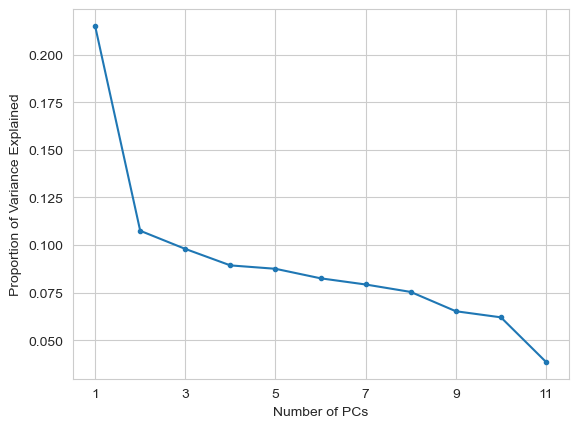

In [144]:
plt.figure()
plt.plot(range(1,12),expl_var,marker='.')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1,12,2))
plt.show()

In [145]:
# Pull out the explained variance ratio
expl_var = my_PCA.explained_variance_ratio_

# Calculate the cumulative sum of this array using the 
cumulative_sum = np.cumsum(expl_var)

cumulative_sum

array([0.21503777, 0.32249432, 0.42042226, 0.50969298, 0.59718163,
       0.67966944, 0.75891009, 0.8342414 , 0.8994339 , 0.96142422,
       1.        ])

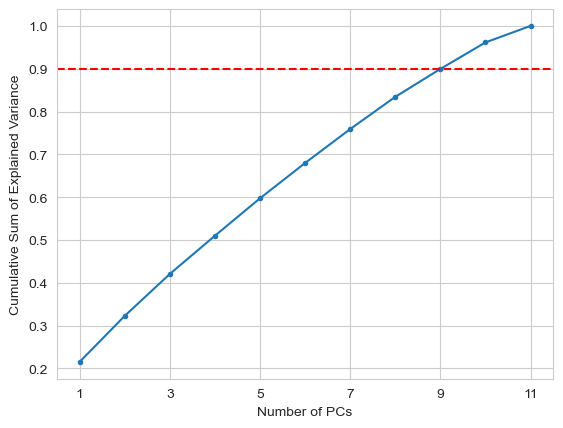

In [146]:
# Plot out the cumulative sum graph

plt.figure()
plt.plot(range(1,12), cumulative_sum, marker='.')
plt.axhline(0.9, c='r', linestyle='--')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Sum of Explained Variance')
plt.xticks(range(1,12,2))
plt.show()

In [147]:
# Instantiate and fit
my_PCA = PCA(n_components = 10)
my_PCA.fit(X_train_ss)

# Transform train and test
X_train_PCA = my_PCA.transform(X_train_ss)
X_test_PCA = my_PCA.transform(X_test_ss)


In [148]:
print(f'Original: {X_train_ss.shape}')
print(f'PCA Transformed: {X_train_PCA.shape}')

Original: (7778, 11)
PCA Transformed: (7778, 10)


In [149]:
# Instantiate and fit
my_PCA = PCA(n_components = 0.95)
my_PCA.fit(X_train_ss)

# Transform train and test
X_train_PCA = my_PCA.transform(X_train_ss)
X_test_PCA = my_PCA.transform(X_test_ss)

In [150]:
print(f'Original: {X_train_ss.shape}')
print(f'PCA Transformed: {X_train_PCA.shape}')

Original: (7778, 11)
PCA Transformed: (7778, 10)


In [151]:
# Do the same but fit on the PCA transformed data
my_logreg_PCA = LogisticRegression(C=1, random_state=42,max_iter=100000)

# Fitting to PCA data
my_logreg_PCA.fit(X_train_PCA,y_train_sam)

# Scoring on PCA train and test sets
print(f'Train Score: {my_logreg_PCA.score(X_train_PCA, y_train_sam)}')
print(f'Test Score: {my_logreg_PCA.score(X_test_PCA, y_test)}')

Train Score: 0.7933916173823605
Test Score: 0.776908023483366


In [152]:
# class distribution
display(y_test.value_counts())

# predict classification
y_test_pred = my_logreg_PCA.predict(X_test_PCA) # USING THE UNSAMPLED BUT SCALED TEST DATA

# confusion matrix
conmat = pd.DataFrame(
    data = confusion_matrix(y_test, y_test_pred),
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1']
)
display(conmat)

print(f'Recall score: {recall_score(y_test, y_test_pred)*100:0.1f}%')
print(f'Precision score: {precision_score(y_test, y_test_pred)*100:0.1f}%')
print(f'F1 score: {f1_score(y_test, y_test_pred)*100:0.1f}%')

stroke
0    972
1     50
Name: count, dtype: int64

,predicted 0,predicted 1
true 0,770,202
true 1,26,24


Recall score: 48.0%
Precision score: 10.6%
F1 score: 17.4%


Since the number of columns are not significant, PCA is not a good method for feature enginering

In [153]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test, y_test_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.97      0.79      0.87       972
           1       0.11      0.48      0.17        50

    accuracy                           0.78      1022
   macro avg       0.54      0.64      0.52      1022
weighted avg       0.93      0.78      0.84      1022



💡 Recommendation: The goal should be to minimize false negatives as much as possible to avoid under-predicting the 'Stroke' class, while also reducing false positives to avoid over-predicting the 'Stroke' class. This could potentially be achieved by further tuning the model's parameters, exploring different algorithms, or engineering new features.